# Development of the SL147 scheme

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from Bio import SeqIO

In [1]:
# Change the current working directory 
os.chdir('/path/to/your/dir/')
print("Current working directory:", os.getcwd())

In [4]:
# Load the Excel file with all isolates that have whole genome sequence data
data=pd.read_excel('./BIGSDB_datasets/all/All_KP1_assebly_check_passed.xlsx')   
print(data.shape)
#print(data.head())

(37874, 37)


In [5]:
# Load the Excel file with all isolates that have whole genome sequence data
data=pd.read_excel('./BIGSDB_datasets/all/All_KP1_assebly_check_passed.xlsx')   
print(data.shape)
#print(data.head())

(37874, 37)


In [6]:
# open QC failed isolates
qc_failed_isolates=pd.read_csv('./BIGSDB_datasets/all/qc_failed_isolates.txt', header=None)   
qc_failed_isolates=list(qc_failed_isolates[0])
#print(qc_failed_isolates)
print(len(qc_failed_isolates))

5627


In [7]:
# Remove the prefix (id) or suffix(isolate name) from the QC failed isolates names
failed_names = [entry.split('_', 1)[1] if '_' in entry else entry for entry in qc_failed_isolates]
failed_ids = [entry.split('_', 1)[0] if '_' in entry else entry for entry in qc_failed_isolates]
failed_ids =  [int(entry) for entry in failed_ids]
print(failed_names[0])
print(failed_ids[0])

SRR9858799
42290


In [8]:
# remove qc failed isolates
qc_passed_KP1 = data[~data['id'].isin(failed_ids)]
print(qc_passed_KP1.shape)
print(qc_passed_KP1.head(1))

(32247, 37)
   id isolate       aliases  sender  curator date_entered   datestamp  \
0   6  02A029  02A029; SB14       2      504   2006-09-05  2022-11-03   

  taxonomic_designation phylogroup_from_ST QC_status  ...  \
0         K. pneumoniae       Kp1 (7 loci)         0  ...   

   scgST (scgMLST629_S)  LINcode (scgMLST629_S) Phylogroup (scgMLST629_S)  \
0                  9677  0_0_429_0_42_0_1_0_0_0                       Kp1   

  Sublineage (scgMLST629_S) Clonal group (scgMLST629_S) ST (MLST)  \
0                      SL23                        CG23        23   

  rST (Ribosomal MLST) genus (Ribosomal MLST) species (Ribosomal MLST)  \
0                19197             Klebsiella    Klebsiella pneumoniae   

  subspecies (Ribosomal MLST)  
0                         NaN  

[1 rows x 37 columns]


In [9]:
SL147=qc_passed_KP1[qc_passed_KP1['Sublineage (scgMLST629_S)']=='SL147']
print(SL147.shape)
print(SL147.head(1))

(1863, 37)
      id isolate aliases  sender  curator date_entered   datestamp  \
35  1490     M49     NaN     630      523   2021-11-29  2024-06-03   

   taxonomic_designation phylogroup_from_ST QC_status  ...  \
35         K. pneumoniae                NaN         0  ...   

    scgST (scgMLST629_S)  LINcode (scgMLST629_S) Phylogroup (scgMLST629_S)  \
35             2889;2890  0_0_197_0_4_0_10_0_5_0                       Kp1   

   Sublineage (scgMLST629_S) Clonal group (scgMLST629_S) ST (MLST)  \
35                     SL147                       CG147       147   

   rST (Ribosomal MLST) genus (Ribosomal MLST) species (Ribosomal MLST)  \
35                19272             Klebsiella    Klebsiella pneumoniae   

   subspecies (Ribosomal MLST)  
35                         NaN  

[1 rows x 37 columns]


In [11]:
#make a copy of the df
df_LIN10=SL147.copy()

#full LINcode
unique_LIN10 = df_LIN10['LINcode (scgMLST629_S)'].unique()
print(len(unique_LIN10))

1069


In [12]:
#isolates with unique full LINcodes
unique_LIN10 = df_LIN10['LINcode (scgMLST629_S)'].unique()
print(len(unique_LIN10))

1069


In [13]:
## For each unique LINcode value get one (the first) corresponding BIGSDB id
# Create a dictionary to store the unique values and corresponding ids
unique_ids = {}

# Iterate over unique values and select one corresponding id for each
for value in unique_LIN10:
    # Get the first id corresponding to this unique value
    id_value = df_LIN10[df_LIN10['LINcode (scgMLST629_S)'] == value]['id'].iloc[0]
    unique_ids[value] = id_value

len(unique_ids.values())

1069

In [15]:
unique_ids_list = list(unique_ids.values())
output_file = './Centaur_project/Klebsiella/KpI/ST147/unique_ids_LIN10.txt'

# Open the file in write mode and save the list
with open(output_file, 'w') as file:
    for item in unique_ids_list:
        file.write(f"{item}\n")  # Write each id followed by a newline

In [19]:
unique_ids_LIN10=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/unique_ids_LIN10.txt', header=None)
unique_ids_LIN10=list(unique_ids_LIN10[0])
unique_ids_LIN10[0]

1490

In [22]:
names=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/names_ST147.txt', header=None)
names=list(names[0])

diff_set = list(set(unique_ids_LIN10) - set(names))
print(len(diff_set))
# Convert the list to a DataFrame
df = pd.DataFrame(diff_set)
# Write the DataFrame to a CSV file
df.to_csv('./Centaur_project/Klebsiella/KpI/ST147/names_missing.txt', sep='\t', index=False, header=None)

95


# Allele statistics with all the 4261 cgMLST95 loci

In [33]:
# the 4261 loci included in the 0.95 threshold cg MLST
loci_95=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt', sep='\t', header=None)   
loci_95=list(loci_95[0])
print(len(loci_95))


4261


# Allele lengths


In [4]:
#allele lengths per locus
from Bio import SeqIO

# Path to the file with locus names
locus_list_file = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt'
output_file = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt'

# Open output file to write the lengths
with open(output_file, 'w') as outfile:
    # Read each locus name from the list
    with open(locus_list_file, 'r') as infile:
        for line in infile:
            locus = line.strip()
            fasta_file = f'./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/CreateSchema/CreateSchema/schema/{locus}.fasta'
            
            # Check if the FASTA file exists for each locus
            try:
                # Loop through each allele sequence in the FASTA file
                for record in SeqIO.parse(fasta_file, 'fasta'):
                    allele_length = len(record.seq)
                    outfile.write(f"{locus}\t{record.id}\t{allele_length}\n")
            except FileNotFoundError:
                print(f"File {fasta_file} not found for locus {locus}.")


In [188]:
# Load the file 
allele_lengths=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt', sep='\t')   
print(allele_lengths.shape)
print(allele_lengths.head())

(42933, 3)
                      locus                      allele  length
0   10523-1014809-protein10   10523-1014809-protein10_1     495
1   10523-1014809-protein10   10523-1014809-protein10_2     495
2   10523-1014809-protein10   10523-1014809-protein10_3     495
3  10523-1014809-protein100  10523-1014809-protein100_1     369
4  10523-1014809-protein100  10523-1014809-protein100_2     369


In [127]:
#Sanity check
unique_entries = allele_lengths['locus'].unique()
print(len(unique_entries))

4261


In [189]:
# Group by 'Locus' and find the row with the maximum 'Length' for each group
longest_alleles = allele_lengths.loc[allele_lengths.groupby('locus')['length'].idxmax()]
print(longest_alleles.shape)
print(longest_alleles.head())

(4261, 3)
                        locus                       allele  length
0     10523-1014809-protein10    10523-1014809-protein10_1     495
3    10523-1014809-protein100   10523-1014809-protein100_1     369
7   10523-1014809-protein1000  10523-1014809-protein1000_1     645
9   10523-1014809-protein1001  10523-1014809-protein1001_1     963
14  10523-1014809-protein1002  10523-1014809-protein1002_1    1305


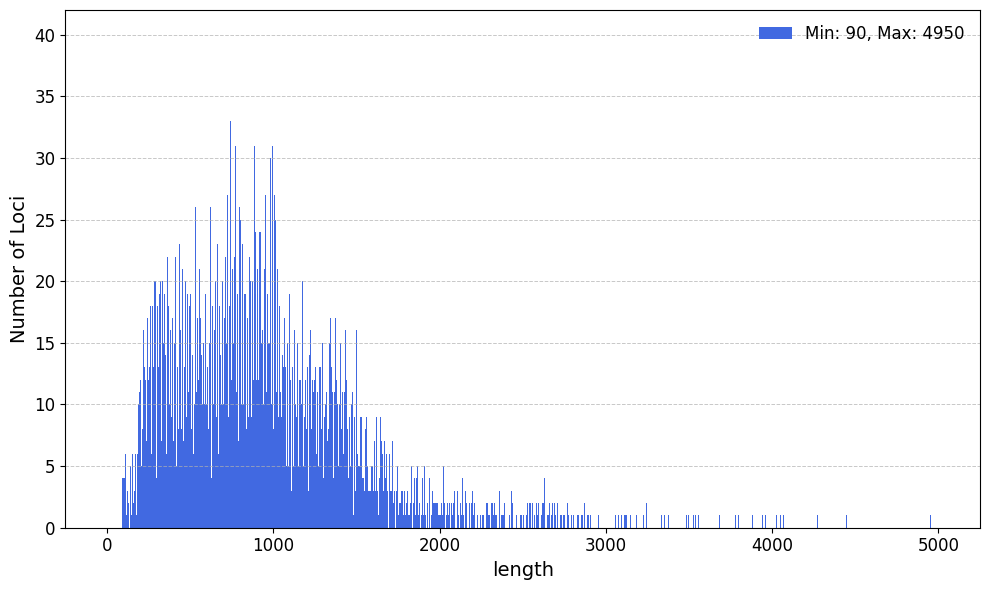

In [190]:
# Calculate the range and bins
min_value = longest_alleles['length'].min()
max_value = longest_alleles['length'].max()
bins = max_value - min_value +1 # Number of bins equals the range (inclusive)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(
    longest_alleles['length'], 
    bins=1000, 
    range=(0, 5000), 
    color='royalblue', 
    alpha=1, 
    edgecolor='black', 
    linewidth=0
)

# Add custom legend for min/max values
legend_text = f"Min: {min_value}, Max: {max_value}"
plt.legend([legend_text], loc='upper right', fontsize=12, frameon=False)

# Customizing the plot
plt.xlabel('length', fontsize=14)
plt.ylabel('Number of Loci', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/plots/longest_allele_lengths_all_cgMLST95.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [191]:
# open the file coming from SchemaEvaluator_95 (containing only the loci present in the 95% of isolates) schema_report. 
# when you open this html file you can download a table Allele Analysis
allele_analysis=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/allele_analysis.tsv', sep='\t', header=0)   
print(allele_analysis.shape)
print(allele_analysis.head(1))

(4261, 14)
                     Locus  Total Alleles  Valid Alleles  Invalid Alleles  \
0  10523-1014809-protein10              3              3                0   

   Proportion of Validated Alleles  Distinct Protein Alleles  Incomplete ORF  \
0                                1                         2               0   

   Ambiguous Bases  Missing Start/Stop Codon  In-frame Stop Codon  \
0                0                         0                    0   

   Alleles < 0bp  Alleles below threshold  Alleles above threshold  \
0              0                        0                        0   

   Missing Allele IDs  
0                   0  


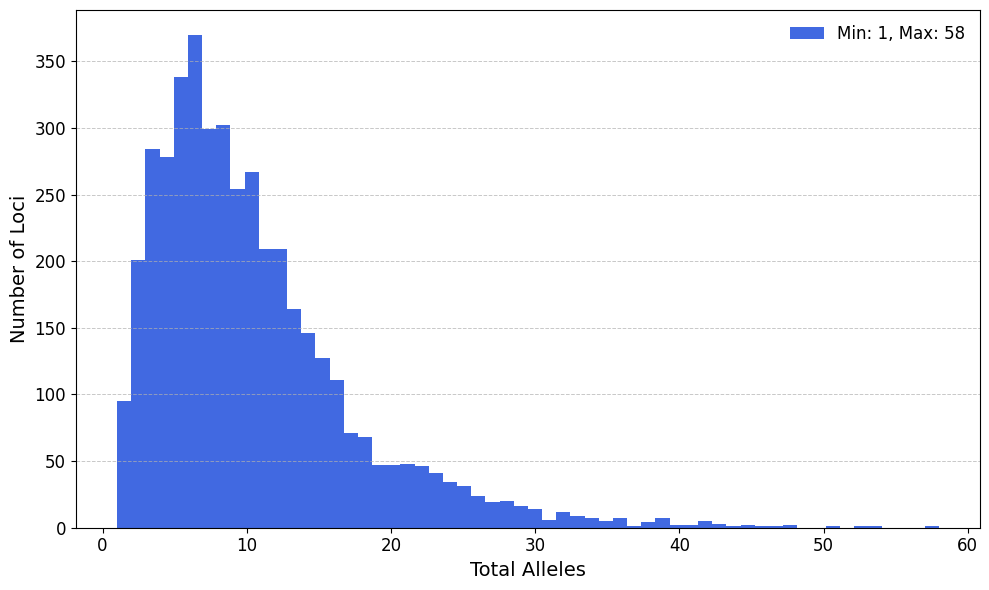

In [192]:
import matplotlib.pyplot as plt
# Calculate the range and bins
min_value = allele_analysis['Total Alleles'].min()
max_value = allele_analysis['Total Alleles'].max()
bins = max_value - min_value +1 # Number of bins equals the range (inclusive)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(
    allele_analysis['Total Alleles'], 
    bins=bins, 
    range=(min_value, max_value), 
    color='royalblue', 
    alpha=1, 
    edgecolor='black', 
    linewidth=0
)

# Add custom legend for min/max values
legend_text = f"Min: {min_value}, Max: {max_value}"
plt.legend([legend_text], loc='upper right', fontsize=12, frameon=False)

# Customizing the plot
plt.xlabel('Total Alleles', fontsize=14)
plt.ylabel('Number of Loci', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

!mkdir -p './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/plots/'
# Save the plot
plt.savefig('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/plots/total_alleles_all_cgMLST95.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Allele frequencies in each locus

In [193]:
# Load the results_alleles.tsv output file of AlleleCall with only the 95 threshold loci 
alleles=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/AlleleCall/AlleleCall_95/results_alleles.tsv', sep='\t', header=0, low_memory=False)   
# Set the first column as rownames (index)
alleles.set_index(alleles.columns[0], inplace=True)

print(alleles.shape)
print(alleles.head(1))

# For each locus, calculate the frequency of each allele and save it in a separate file
# Directory to save the frequency files
output_dir = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/allele_frequencies'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Iterate over the columns (loci) in the alleles DataFrame
for locus in alleles.columns:
    # Get the allele frequencies for the current locus
    allele_frequencies = alleles[locus].value_counts(normalize=True).reset_index()
    allele_frequencies.columns = ['allele', 'frequency']
    # Define the file path for the output
    output_file = os.path.join(output_dir, f'{locus}_frequencies.tsv')    
    # Save the frequencies as a TSV file
    allele_frequencies.to_csv(output_file, sep='\t', index=False)

(1069, 4261)
               10523-1014809-protein10  10523-1014809-protein100  \
FILE                                                               
10523_1014809                        1                         1   

               10523-1014809-protein1000  10523-1014809-protein1001  \
FILE                                                                  
10523_1014809                          1                          1   

               10523-1014809-protein1002 10523-1014809-protein1003  \
FILE                                                                 
10523_1014809                          1                         1   

              10523-1014809-protein1004  10523-1014809-protein1005  \
FILE                                                                 
10523_1014809                         1                          1   

               10523-1014809-protein1006 10523-1014809-protein1007  ...  \
FILE                                                                ...

In [14]:
# List to collect all allele frequency data
all_allele_frequencies = []

# Iterate over the columns (loci) in the alleles DataFrame
for locus in alleles.columns:
    # Get the allele frequencies for the current locus
    allele_frequencies = alleles[locus].value_counts(normalize=True).reset_index()
    allele_frequencies.columns = ['allele', 'frequency']
    
    # Add the Locus name to the DataFrame
    allele_frequencies['locus'] = locus
    
    # Append the data to the list
    all_allele_frequencies.append(allele_frequencies)

# Combine all DataFrames into a single DataFrame
final_allele_frequencies = pd.concat(all_allele_frequencies, ignore_index=True)

# Directory to save the final frequency file
output_dir = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define the file path for the final output
output_file = os.path.join(output_dir, 'all_allele_frequencies.tsv')

# Save the combined DataFrame as a single TSV file
final_allele_frequencies.to_csv(output_file, sep='\t', index=False)

print(f"All allele frequencies have been saved to {output_file}")

All allele frequencies have been saved to ./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/all_allele_frequencies.tsv


In [194]:
#load the file
allele_frequencies=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/all_allele_frequencies.tsv', sep='\t', low_memory=False)   
print(allele_frequencies.shape)
print(allele_frequencies.head())

(47232, 3)
  allele  frequency                     locus
0      1   0.998129   10523-1014809-protein10
1      2   0.000935   10523-1014809-protein10
2      3   0.000935   10523-1014809-protein10
3      1   0.996258  10523-1014809-protein100
4      3   0.001871  10523-1014809-protein100


In [195]:
allele_frequencies[allele_frequencies['allele'].str.startswith(('INF', 'PLOT3', 'PLOT5', 'LOTSC', 'NIPH', 'NIPHEM', 'ALM', 'ASM', 'PAMA', 'LNF'))]

,allele,frequency,locus
28,LNF,0.000935,10523-1014809-protein1003
40,ASM,0.000935,10523-1014809-protein1004
59,LNF,0.001871,10523-1014809-protein1007
61,ASM,0.000935,10523-1014809-protein1007
73,LNF,0.000935,10523-1014809-protein1009
...,...,...,...
47185,ASM,0.000935,7106-NMI2273-16-protein1012
47201,LNF,0.002806,73875-9702-22-protein2759
47214,PLOT3,0.000935,73875-9702-22-protein2759
47220,LNF,0.003742,73875-9702-22-protein4211


In [197]:
# Check for loci containing alleles marked as 'NIPHEM', 'NIPH' (Non-Informative Paralogous Hits) by chewBBACA 
# Create an empty list to store locus names
NIPH_loci_above_threshold = []
Threshold=0.01
# Group by the 'Locus' column
grouped = allele_frequencies.groupby('locus')

# Iterate over each group
for locus, group in grouped:
    # Calculate the sum of frequencies for 'NIPHEM' and 'NIPH'
    frequency_sum = group.loc[group['allele'].isin(['NIPHEM', 'NIPH']), 'frequency'].sum()
    
    # Check if the sum is >= threshold
    if frequency_sum >= Threshold:
        #print(frequency_sum)
        NIPH_loci_above_threshold.append(locus)

# Display the result
print(len(NIPH_loci_above_threshold))

# Assuming all_loci is your list
with open("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/Non_informative_paralogous_loci_0.01.txt", "w") as f:
    for locus in NIPH_loci_above_threshold:
        f.write(f"{locus}\n")

38


In [198]:
# remove the 'NIPHEM' + 'NIPH' loci from cgMLST_95 loci 
filtered_cgMLST_95 = list(set(loci_95) - set(NIPH_loci_above_threshold))
# Save 
with open("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/filtered_cgMLST_95_loci_noNIPH.txt", "w") as file:
    for item in filtered_cgMLST_95:
        file.write(f"{item}\n")

print(len(filtered_cgMLST_95))

4223


In [204]:
# Modify the Allele column to keep only the suffix after the '_'
allele_lengths=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt', sep='\t')   
allele_lengths['allele'] = allele_lengths['allele'].str.split('_').str[1]

# Ensure the Allele column is numeric (convert to number, coercing errors to NaN)
# classification type counts (INF, PLOT3, PLOT5, LOTSC, NIPH, NIPHEM, ALM, ASM, PAMA, LNF) will turn to NAN
allele_lengths['allele'] = pd.to_numeric(allele_lengths['allele'], errors='coerce')
allele_frequencies['allele'] = pd.to_numeric(allele_frequencies['allele'], errors='coerce')

# merge operation
merged_df = allele_frequencies.merge(allele_lengths, on=['locus', 'allele'], how='left')

# Fill any missing 'Length' values with 0 (if the allele is not found in allele_lengths)
merged_df['length'].fillna(0, inplace=True)

# Save the merged DataFrame
merged_df.to_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/allele_frequencies_with_lengths.tsv', sep='\t', index=False)

In [205]:
# Group by Locus and Length, summing the Frequency for each group
grouped_df = merged_df.groupby(['locus', 'length'], as_index=False)['frequency'].sum()

# Save the grouped DataFrame
grouped_df.to_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/grouped_allele_frequencies_by_length.tsv', sep='\t', index=False)
print(grouped_df.shape)
print(grouped_df.head(100))

(9589, 3)
                        locus  length  frequency
0     10523-1014809-protein10   495.0   1.000000
1    10523-1014809-protein100   369.0   1.000000
2   10523-1014809-protein1000   645.0   1.000000
3   10523-1014809-protein1001   963.0   1.000000
4   10523-1014809-protein1002  1167.0   0.001871
..                        ...     ...        ...
95  10523-1014809-protein1052     0.0   0.002806
96  10523-1014809-protein1052   900.0   0.997194
97  10523-1014809-protein1053   576.0   1.000000
98  10523-1014809-protein1054   450.0   1.000000
99  10523-1014809-protein1055   384.0   0.000935

[100 rows x 3 columns]


In [206]:
# Sanity check: Sum of frequencies for each Locus should be 1
locus_frequencies_check = grouped_df.groupby('locus')['frequency'].sum()
print(locus_frequencies_check.shape)
print(locus_frequencies_check.head(100))

(4261,)
locus
10523-1014809-protein10      1.0
10523-1014809-protein100     1.0
10523-1014809-protein1000    1.0
10523-1014809-protein1001    1.0
10523-1014809-protein1002    1.0
                            ... 
10523-1014809-protein110     1.0
10523-1014809-protein1101    1.0
10523-1014809-protein1102    1.0
10523-1014809-protein1103    1.0
10523-1014809-protein1104    1.0
Name: frequency, Length: 100, dtype: float64


# Remove loci matching all BIGSdb and rMLST loci

In [24]:
##### Calculate allele lengths

# all bigsdb loci
input_file = './Centaur_project/Klebsiella/Alleles/klebsiella_all_alleles/klebsiella_all_alleles.fa'
output_file = './Centaur_project/Klebsiella/Alleles/klebsiella_all_alleles/allele_lengths.txt'

with open(output_file, 'w') as outfile:
    outfile.write("locus\tallele\tlength\n")  # header
    for record in SeqIO.parse(input_file, 'fasta'):
        # record.id expected in form: zraP_S|160
        if "|" in record.id:
            locus, allele_suffix = record.id.split("|", 1)
            allele = record.id.replace('|', '_')
        else:
            locus = record.id
            allele = record.id  # no change if no "|"
        allele_length = len(record.seq)
        outfile.write(f"{locus}\t{allele}\t{allele_length}\n")

# rMLST loci lengths
fasta_dir = "./Centaur_project/Klebsiella/Alleles/rMLST/fasta/"
names_file = "./Centaur_project/Klebsiella/Alleles/rMLST/rMLST_loci.txt"
output_file = "./Centaur_project/Klebsiella/Alleles/rMLST/allele_lengths.txt"

# Read locus names to process
with open(names_file) as f:
    loci_set = set(line.strip() for line in f if line.strip())

with open(output_file, 'w') as outfile:
    outfile.write("locus\tallele\tlength\n")  # header

    for file in os.listdir(fasta_dir):
        if not (file.endswith('.fasta') or file.endswith('.fa')):
            continue
        locus = os.path.splitext(file)[0]
        if locus not in loci_set:
            continue
        fasta_path = os.path.join(fasta_dir, file)
        for record in SeqIO.parse(fasta_path, 'fasta'):
            allele = record.id.replace('|', '_')    # e.g. abc|10 -> abc_10
            allele_length = len(record.seq)
            outfile.write(f"{locus}\t{allele}\t{allele_length}\n")


# Kpn loci
fasta_dir = "./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/fasta/"
names_file = "./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt"
output_file = "./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/allele_lengths.txt"
# Read locus names to process
with open(names_file) as f:
    loci_set = set(line.strip() for line in f if line.strip())

with open(output_file, 'w') as outfile:
    outfile.write("locus\tallele\tlength\n")  # header

    for file in os.listdir(fasta_dir):
        if not (file.endswith('.fasta') or file.endswith('.fa')):
            continue
        locus = os.path.splitext(file)[0]
        if locus not in loci_set:
            continue
        fasta_path = os.path.join(fasta_dir, file)
        for record in SeqIO.parse(fasta_path, 'fasta'):
            allele = record.id.replace('|', '_')    # e.g. abc|10 -> abc_10
            allele_length = len(record.seq)
            outfile.write(f"{locus}\t{allele}\t{allele_length}\n")


# For all new ST147 loci
fasta_dir = "./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/fasta/"
names_file = "./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt"
output_file = "./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt"
# Read locus names to process
with open(names_file) as f:
    loci_set = set(line.strip() for line in f if line.strip())

with open(output_file, 'w') as outfile:
    outfile.write("locus\tallele\tlength\n")  # header

    for file in os.listdir(fasta_dir):
        if not (file.endswith('.fasta') or file.endswith('.fa')):
            continue
        locus = os.path.splitext(file)[0]
        if locus not in loci_set:
            continue
        fasta_path = os.path.join(fasta_dir, file)
        for record in SeqIO.parse(fasta_path, 'fasta'):
            allele = record.id.replace('|', '_')    # e.g. abc|10 -> abc_10
            allele_length = len(record.seq)
            outfile.write(f"{locus}\t{allele}\t{allele_length}\n")


In [3]:
#open length info files for new loci and BIGSDB loci
new_loci_lengths = pd.read_csv("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt", sep='\t')   
bigsdb_loci_lengths = pd.read_csv('./Centaur_project/Klebsiella/Alleles/klebsiella_all_alleles/allele_lengths.txt', sep='\t')
rMLST_loci_length = pd.read_csv("./Centaur_project/Klebsiella/Alleles/rMLST/allele_lengths.txt", sep='\t')
kpn_loci_lengths= pd.read_csv("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/allele_lengths.txt", sep='\t')
bigsdb_rMLST_loci_lengths = pd.concat([bigsdb_loci_lengths, kpn_loci_lengths, rMLST_loci_length], ignore_index=True)

# add this collumns to make the merge of this df easier
new_loci_lengths['length_new']=new_loci_lengths['length']
bigsdb_rMLST_loci_lengths['length_old']=bigsdb_rMLST_loci_lengths['length']

print(new_loci_lengths.shape)
print(new_loci_lengths.head(1))

print(bigsdb_rMLST_loci_lengths.shape)
print(bigsdb_rMLST_loci_lengths.tail(1))

(42933, 4)
                     locus                     allele  length  length_new
0  10523-1014809-protein10  10523-1014809-protein10_1     495         495
(2294952, 4)
        locus allele  length  length_old
2294951  rpsU   rpsU     216         216


In [4]:
# open scheme info from BIGSDB
schemes_members = pd.read_csv('./Centaur_project/Klebsiella/Alleles/scheme_members.txt', sep='\t')
schemes_members=schemes_members[['scheme_id', 'locus']]

schemes = pd.read_csv('./Centaur_project/Klebsiella/Alleles/schemes.txt', sep='\t')
schemes['scheme_id']=schemes['id']
schemes['Scheme']=schemes['name']
schemes=schemes[['scheme_id', 'Scheme']]

schemes_info = schemes_members.merge(schemes, on='scheme_id')[['Scheme', 'locus']]

# add rMLST loci
rMLST_loci = pd.read_csv('./Centaur_project/Klebsiella/Alleles/rMLST/rMLST_loci.txt', sep='\t', header=None)
rMLST_loci['locus']=rMLST_loci.iloc[:,0]
rMLST_loci['Scheme'] = 'rMLST'
rMLST_loci=rMLST_loci[['Scheme', 'locus']]
# Concatenate both DataFrames
schemes_info = pd.concat([schemes_info, rMLST_loci], ignore_index=True)
print(schemes_info.shape)
print(schemes_info.head(1))

(5534, 2)
  Scheme locus
0   MLST  gapA


In [5]:
# Ensure the column names align 
schemes_info.rename(columns={'locus': 'old_locus'}, inplace=True)
schemes_info.head(1)

,Scheme,old_locus
0,MLST,gapA


### Blast results between the new loci and the old loci

In [35]:
# Open all new loci alleles against all the alleles from BIGSDB blast results and combine into one df 
# after filtering for the best match (based on evalue (lowest) and bitscore (highest)) for each new locus

blast_dir = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_bigsdb_allele_1/'
names_file = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt'

# Columns for BLAST results
columns = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen', 
           'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']

# Initialize an empty list to store filtered DataFrames
filtered_dfs = []

# Read the fileS
with open(names_file, 'r') as f:
    loci_files = [line.strip() for line in f]

# Process each file
for locus_file in loci_files:
    file_path = f"{blast_dir}/{locus_file}"
    
    # Read the BLAST results of each locus alleles vs all bigsdb alleles. 
    df = pd.read_csv(file_path, sep='\t', names=columns)  
    # Extract new and old locus names
    df['old_locus'] = df['sseqid'].str.split('|').str[0]
    df['old_allele'] = df['sseqid'].str.replace('|', '_')
    df['new_allele'] = df['qseqid']
    
    # Perform merge with scheme data
    df = df.merge(
        schemes_info[['old_locus', 'Scheme']],
        on='old_locus',
        how='left'
        )
    
    # Replace NaN values in the 'Scheme' column with 'No_scheme' for loci with no scheme
    df['Scheme'] = df['Scheme'].fillna('no_scheme')
    
    # Perform merge with length data
    df = df.merge(
        new_loci_lengths[['allele', 'length_new']],
        left_on='new_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])

    df = df.merge(
        bigsdb_rMLST_loci_lengths[['allele', 'length_old']],
        left_on='old_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])
    
    # Sort
    df = df.sort_values(by=['Scheme', 'bitscore'], ascending=[True, False])

    # Keep the best match per scheme
    df = df.groupby('Scheme', as_index=False).first()
   
    # Append the filtered DataFrame to the list
    filtered_dfs.append(df)
   
# Combine all filtered DataFrames into one
combined_df = pd.concat(filtered_dfs, ignore_index=True)

bigsdb_blast=combined_df
# Save the combined DataFrame or inspect it
bigsdb_blast.to_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_bigsdb_allele_1_all.tsv',sep='\t', index=False)

print(bigsdb_blast.shape)
print(bigsdb_blast.head())

(4934, 18)
                      Scheme                       qseqid           sseqid  \
0  cgMLST_ST258_ST512_ST1199    10523-1014809-protein10_1  KPNJ2_RS02790|1   
1                 cgMLST_KpI   10523-1014809-protein100_1  KPNJ2_RS03345|1   
2               scgMLST629_S   10523-1014809-protein100_1     KP1_4823_S|1   
3                 scgMLST634   10523-1014809-protein100_1       KP1_4823|1   
4                 cgMLST_KpI  10523-1014809-protein1000_1  KPNJ2_RS20425|1   

    pident length mismatch gapopen qstart qend sstart send  evalue  bitscore  \
0   99.797    493        1       0      1  493      1  493     0.0     905.0   
1   99.729    369        1       0      1  369      1  369     0.0     676.0   
2  100.000    369        0       0      1  369      1  369     0.0     682.0   
3  100.000    366        0       0      1  366      1  366     0.0     676.0   
4   99.845    645        1       0      1  645      1  645     0.0    1186.0   

       old_locus       old_allele      

In [36]:
# Open all new loci alleles against the rMLST loci blast results and combine into one df 
# after filtering for the best match (based on evalue (lowest) and bitscore (highest)) for each new locus

blast_dir = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_rMLST'
names_file = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt'

# Columns for BLAST results
columns = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen', 
           'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']


# Initialize an empty list to store filtered DataFrames
filtered_dfs = []

# Read the fileS
with open(names_file, 'r') as f:
    loci_files = [line.strip() for line in f]

# Process each file
for locus_file in loci_files:
    file_path = f"{blast_dir}/{locus_file}"
    
    # Read the BLAST results of each locus alleles vs all bigsdb alleles. 
    df = pd.read_csv(file_path, sep='\t', names=columns)  
    # Extract new and old locus names
    df['old_locus'] = df['sseqid'].str.split('|').str[0]
    df['old_allele'] = df['sseqid'].str.replace('|', '_')
    df['new_allele'] = df['qseqid']
    
    # Perform merge with scheme data
    df = df.merge(
        schemes_info[['old_locus', 'Scheme']],
        on='old_locus',
        how='left'
        )
    
    # Replace NaN values in the 'Scheme' column with 'No_scheme' for loci with no scheme
    df['Scheme'] = df['Scheme'].fillna('no_scheme')
    
    # Perform merge with length data
    df = df.merge(
        new_loci_lengths[['allele', 'length_new']],
        left_on='new_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])

    df = df.merge(
        bigsdb_rMLST_loci_lengths[['allele', 'length_old']],
        left_on='old_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])
    
    # Sort
    df = df.sort_values(by=['Scheme', 'bitscore'], ascending=[True, False])

    # Keep the best match per scheme
    df = df.groupby('Scheme', as_index=False).first()
   
    # Append the filtered DataFrame to the list
    filtered_dfs.append(df)
   
    
# Combine all filtered DataFrames into one
combined_df = pd.concat(filtered_dfs, ignore_index=True)

rMLST_blast=combined_df
# Save the combined DataFrame or inspect it
rMLST_blast.to_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_rMLST.tsv', sep='\t', index=False)

print(rMLST_blast.shape)
print(rMLST_blast.head())

(50, 18)
  Scheme                       qseqid sseqid   pident length mismatch gapopen  \
0  rMLST  10523-1014809-protein1799_1   rpsF  100.000    396        0       0   
1  rMLST  10523-1014809-protein1801_1   rpsR  100.000    228        0       0   
2  rMLST  10523-1014809-protein1802_1   rplI   99.778    450        1       0   
3  rMLST   10523-1014809-protein196_1   rpsU  100.000    216        0       0   
4  rMLST  10523-1014809-protein2110_1   rpsG  100.000    471        0       0   

  qstart qend sstart send         evalue bitscore old_allele  \
0      1  396      1  396   0.000000e+00      732       rpsF   
1      1  228      1  228  3.600000e-121      422       rpsR   
2      1  450      1  450   0.000000e+00      826       rplI   
3      1  216      1  216  1.600000e-114      399       rpsU   
4      1  471      1  471   0.000000e+00      870       rpsG   

                    new_allele old_locus  length_new  length_old  
0  10523-1014809-protein1799_1      rpsF         396

In [ ]:
# Open all new ST147 loci alleles against all the Kpn_cgMLST type alleles and combine into one df 
# after filtering for the best match (based on evalue (lowest) and bitscore (highest)) for each new locus

blast_dir = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_all_Kpn_cgMLST_type_alleles/'
names_file = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt'

# Columns for BLAST results
columns = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen', 
           'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']

# Initialize an empty list to store filtered DataFrames
filtered_dfs = []

# Read the fileS
with open(names_file, 'r') as f:
    loci_files = [line.strip() for line in f]

# Process each file
for locus_file in loci_files:
    file_path = f"{blast_dir}/{locus_file}"
    
    # Read the BLAST results of each locus alleles vs all bigsdb alleles. 
    df = pd.read_csv(file_path, sep='\t', names=columns)  
    # Extract new and old locus names
    df['old_locus'] = df['sseqid'].str.split('|').str[0]
    df['old_allele'] = df['sseqid'].str.replace('|', '_')
    df['new_allele'] = df['qseqid']
    
    # Perform merge with scheme data
    df = df.merge(
        schemes_info[['old_locus', 'Scheme']],
        on='old_locus',
        how='left'
        )
    
    # Replace NaN values in the 'Scheme' column with 'No_scheme' for loci with no scheme
    df['Scheme'] = df['Scheme'].fillna('no_scheme')
    
    # Perform merge with length data
    df = df.merge(
        new_loci_lengths[['allele', 'length_new']],
        left_on='new_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])

    df = df.merge(
        bigsdb_rMLST_loci_lengths[['allele', 'length_old']],
        left_on='old_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])
    
    # Sort
    df = df.sort_values(by=['Scheme', 'bitscore'], ascending=[True, False])

    # Keep the best match per scheme
    df = df.groupby('Scheme', as_index=False).first()
   
    # Append the filtered DataFrame to the list
    filtered_dfs.append(df)

# Combine all filtered DataFrames into one
combined_df = pd.concat(filtered_dfs, ignore_index=True)

Kpn_cgMLST_blast=combined_df
# Save the combined DataFrame or inspect it
Kpn_cgMLST_blast['Scheme']='Kpn_cgMLST'
Kpn_cgMLST_blast.to_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_Kpn_cgMLST_type_alleles.tsv',sep='\t', index=False)

print(Kpn_cgMLST_blast.shape)
print(Kpn_cgMLST_blast.head())

In [10]:
#open all blast results (BIGSdb, rMLST, KpncgMLST)
bigsdb_blast=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_bigsdb_allele_1_all.tsv', sep='\t')
rMLST_blast=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_rMLST.tsv', sep='\t')
Kpn_cgMLST_blast=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_Kpn_cgMLST_type_alleles.tsv', sep='\t')
# concatenate the rMLST and the BIGSdb loci blast results together
all_blast = pd.concat([bigsdb_blast, rMLST_blast, Kpn_cgMLST_blast], ignore_index=True)

print(all_blast.shape)
print(all_blast.head(1))
print(all_blast.tail(1))

(7738, 18)
                      Scheme                     qseqid           sseqid  \
0  cgMLST_ST258_ST512_ST1199  10523-1014809-protein10_1  KPNJ2_RS02790|1   

   pident  length  mismatch  gapopen  qstart  qend  sstart  send  evalue  \
0  99.797     493         1        0       1   493       1   493     0.0   

   bitscore      old_locus       old_allele                 new_allele  \
0     905.0  KPNJ2_RS02790  KPNJ2_RS02790_1  10523-1014809-protein10_1   

   length_new  length_old  
0         495         495  
          Scheme                       qseqid                          sseqid  \
7737  Kpn_cgMLST  73875-9702-22-protein4211_2  57692-Kp20190630-protein3633_2   

      pident  length  mismatch  gapopen  qstart  qend  sstart  send  evalue  \
7737  99.432    1761        10        0       1  1761       1  1761     0.0   

      bitscore                       old_locus  \
7737    3197.0  57692-Kp20190630-protein3633_2   

                          old_allele                   

In [12]:
# open the new loci have high frequency of NIPH+NIPHEM alleles
NIPH_loci_above_threshold = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/Non_informative_paralogous_loci_0.01.txt', sep='\t', header=None)
NIPH_loci_above_threshold=list(NIPH_loci_above_threshold[0])

# Remove rows which are in NIPH+NIPHEM loci above the threshold (n=18, 1 %)
#all_blast = all_blast[~all_blast['new_locus'].isin(NIPH_loci_above_threshold)]
print(all_blast.shape)
print(all_blast.head(1))
print(all_blast.tail(1))

(7738, 18)
                      Scheme                     qseqid           sseqid  \
0  cgMLST_ST258_ST512_ST1199  10523-1014809-protein10_1  KPNJ2_RS02790|1   

   pident  length  mismatch  gapopen  qstart  qend  sstart  send  evalue  \
0  99.797     493         1        0       1   493       1   493     0.0   

   bitscore      old_locus       old_allele                 new_allele  \
0     905.0  KPNJ2_RS02790  KPNJ2_RS02790_1  10523-1014809-protein10_1   

   length_new  length_old  
0         495         495  
          Scheme                       qseqid                          sseqid  \
7737  Kpn_cgMLST  73875-9702-22-protein4211_2  57692-Kp20190630-protein3633_2   

      pident  length  mismatch  gapopen  qstart  qend  sstart  send  evalue  \
7737  99.432    1761        10        0       1  1761       1  1761     0.0   

      bitscore                       old_locus  \
7737    3197.0  57692-Kp20190630-protein3633_2   

                          old_allele                   

### Make the identity and coverage check

In [13]:
all_blast['coverage_new']= all_blast['length']/all_blast['length_new']
all_blast['coverage_old']= all_blast['length']/all_blast['length_old']


blast_results_check_passed = all_blast[
    (all_blast['pident'] >= 80) &
    ((all_blast['coverage_new'] >= 0.8) | (all_blast['coverage_old'] >= 0.8))
]

#save
blast_results_check_passed.to_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/blast_results_check_passed.tsv', sep='\t', index=False)

print(blast_results_check_passed.shape)
print(blast_results_check_passed.head())

(7605, 20)
                      Scheme                       qseqid           sseqid  \
0  cgMLST_ST258_ST512_ST1199    10523-1014809-protein10_1  KPNJ2_RS02790|1   
1                 cgMLST_KpI   10523-1014809-protein100_1  KPNJ2_RS03345|1   
2               scgMLST629_S   10523-1014809-protein100_1     KP1_4823_S|1   
3                 scgMLST634   10523-1014809-protein100_1       KP1_4823|1   
4                 cgMLST_KpI  10523-1014809-protein1000_1  KPNJ2_RS20425|1   

    pident  length  mismatch  gapopen  qstart  qend  sstart  send  evalue  \
0   99.797     493         1        0       1   493       1   493     0.0   
1   99.729     369         1        0       1   369       1   369     0.0   
2  100.000     369         0        0       1   369       1   369     0.0   
3  100.000     366         0        0       1   366       1   366     0.0   
4   99.845     645         1        0       1   645       1   645     0.0   

   bitscore      old_locus       old_allele              

In [14]:
Kpn_cgMLST=blast_results_check_passed[blast_results_check_passed['Scheme']=='Kpn_cgMLST']
print(Kpn_cgMLST.shape)
#print(Kpn_cgMLST.head(1))

(2729, 20)


In [15]:
scgMLST629_S=blast_results_check_passed[blast_results_check_passed['Scheme']=='scgMLST629_S']
print(scgMLST629_S.shape)
#print(scgMLST629_S.head())

(594, 20)


In [16]:
rMLST=blast_results_check_passed[blast_results_check_passed['Scheme']=='rMLST']
print(rMLST.shape)
#print(rMLST.head())

(50, 20)


# Annotation with bakta

In [22]:
# Get gene info from GBFF files produced by bakta
base_dir = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/bakta_results/'
loci_file = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt'

# Output files
gene_output = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/gene_info.tsv'
product_output = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/product_info.tsv'
tag_output = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/tag_info.tsv'

# Function to extract gene and product information
def extract_info_from_gbff(file):
    gene_name = "N/A"
    locus_tag = "N/A"
    product_name = "N/A"

    
    for record in SeqIO.parse(file, "genbank"):
        for feature in record.features:
            if feature.type == "gene":
                gene_name = feature.qualifiers.get('gene', ['N/A'])[0]
                locus_tag = feature.qualifiers.get('locus_tag', ['N/A'])[0]
            if feature.type == "CDS":
                product_name = feature.qualifiers.get('product', ['N/A'])[0]

    return gene_name, locus_tag, product_name

# Read the loci names from the file
with open(loci_file, 'r') as lf:
    loci_list = [line.strip() for line in lf]

# Open the output files for writing
with open(gene_output, 'w') as gene_file, open(tag_output, 'w') as tag_file, open(product_output, 'w') as product_file:
    # Write headers
    gene_file.write("locus\tgene\n")
    tag_file.write("locus\tlocus_tag\n")
    product_file.write("locus\tproduct\n")    
    
    # Iterate over each locus
    for locus in loci_list:
        # Construct the path to the GBFF file
        gbff_path = os.path.join(base_dir, locus, 'ST147_cgMLST.gbff')
        
        if os.path.exists(gbff_path):
            # Extract gene, locus tag, product and pseudogene type info
            gene, tag, product = extract_info_from_gbff(gbff_path)
            
            # Write the locus, gene, and product to the respective TSV files
            gene_file.write(f"{locus}\t{gene}\n")
            tag_file.write(f"{locus}\t{tag}\n")
            product_file.write(f"{locus}\t{product}\n")
            
        # else:
        #     print(f"File not found: {gbff_path}")


In [26]:
# open the bakta info files
gene = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/gene_info.tsv', sep='\t')
product = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/product_info.tsv', sep='\t')
tag = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/tag_info.tsv', sep='\t')

#Merge annotation info
bakta = gene.merge(product[['locus', 'product', ]], on='locus', how='inner')
bakta = bakta.merge(tag[['locus', 'locus_tag', ]], on='locus', how='inner')

# add length info
lengths = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt', sep='\t')
bakta = bakta.merge(
    lengths[['locus', 'length', 'allele']],
    on='locus',
    how='right'
)

bakta.to_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/full_gene_info.tsv', sep='\t', index=False)
print(bakta.shape)
print(bakta.head())

(42933, 6)
                      locus  gene  \
0   10523-1014809-protein10  sspB   
1   10523-1014809-protein10  sspB   
2   10523-1014809-protein10  sspB   
3  10523-1014809-protein100   NaN   
4  10523-1014809-protein100   NaN   

                                       product     locus_tag  length  \
0  ClpXP protease specificity-enhancing factor  MLNEDL_00005     495   
1  ClpXP protease specificity-enhancing factor  MLNEDL_00005     495   
2  ClpXP protease specificity-enhancing factor  MLNEDL_00005     495   
3                                          NaN           NaN     369   
4                                          NaN           NaN     369   

                       allele  
0   10523-1014809-protein10_1  
1   10523-1014809-protein10_2  
2   10523-1014809-protein10_3  
3  10523-1014809-protein100_1  
4  10523-1014809-protein100_2  


# Define type alleles with the most frequent allele

In [34]:
# the new loci that have high frequency of NIPH+NIPHEM alleles
NIPH_loci_above_threshold = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/Non_informative_paralogous_loci_0.01.txt', sep='\t', header=None)
NIPH_loci_above_threshold=list(NIPH_loci_above_threshold[0])
print(len(NIPH_loci_above_threshold))

#open
blast_results_check_passed = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/blast_results_check_passed.tsv', sep='\t')
blast_results_check_passed['new_locus'] = blast_results_check_passed['new_allele'].str.split('_').str[0]
print(blast_results_check_passed.shape)
#print(blast_results_check_passed.head(1))

# name of the new loci which are matching the scgMLST, Kpn_cgMLST and rMLST loci
Kpn_cgMLST=blast_results_check_passed[blast_results_check_passed['Scheme']=='Kpn_cgMLST']
Kpn_cgMLST_loci=list(Kpn_cgMLST['new_locus'])
scgMLST = blast_results_check_passed[blast_results_check_passed['Scheme']=='scgMLST629_S']
scgMLST_loci=list(scgMLST['new_locus'])
rMLST = blast_results_check_passed[blast_results_check_passed['Scheme']=='rMLST']
rMLST_loci=list(rMLST['new_locus'])
print(len(Kpn_cgMLST_loci))
print(len(scgMLST_loci))
print(len(rMLST_loci))

filtered_loci = set(loci_95) - set(NIPH_loci_above_threshold) - set(Kpn_cgMLST_loci) - set(scgMLST_loci) - set(rMLST_loci)

# Convert the list to a pandas DataFrame
filtered_loci_df = pd.DataFrame(filtered_loci, columns=['Locus'])

# Save the DataFrame to a .txt file
filtered_loci_df.to_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/filtered_ST147_loci_864.txt', sep='\t', index=False, header=None)

print(len(filtered_loci))

38
(7605, 21)
2729
594
50
864


In [49]:
#load the file with allele frequencies with lengths
allele_frequencies=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/allele_frequencies_with_lengths.tsv', sep='\t', low_memory=False)   

#There are certain loci that have as most prevalent allele the LNF(Loci Not Found - but stil less than 5% in all cases)
# Convert 'Allele' to numeric and filter out rows where conversion failed to avoid chosing allele which has no sequence
allele_frequencies['allele'] = pd.to_numeric(allele_frequencies['allele'], errors='coerce')
filtered_allele_frequencies = allele_frequencies.dropna(subset=['allele'])

# Group by 'Locus' and find the row with the maximum 'Frequency' for each group
frequent_alleles = filtered_allele_frequencies.loc[filtered_allele_frequencies.groupby('locus')['frequency'].idxmax()]

# keep only filtered alleles
frequent_alleles = frequent_alleles[frequent_alleles['locus'].isin(filtered_loci)]
#frequent_alleles["Allele"] = frequent_alleles["Allele"].astype(int)
print(frequent_alleles.shape)
print(frequent_alleles.head(1))

(864, 4)
    allele  frequency                      locus  length
84     1.0    0.98971  10523-1014809-protein1011   918.0


In [50]:
# Calculate min_length: Length * 0.95, then round to nearest multiple of 3
frequent_alleles['min_length'] = (((frequent_alleles['length'] * 0.95) / 3).round() * 3).astype(int)

# Calculate max_Length: Length * 1.05, then round to nearest multiple of 3
frequent_alleles['max_length'] = (((frequent_alleles['length'] * 1.05) / 3).round() * 3).astype(int)
frequent_alleles

,allele,frequency,locus,length,min_length,max_length
84,1.0,0.989710,10523-1014809-protein1011,918.0,873,963
117,1.0,0.976614,10523-1014809-protein1016,1182.0,1122,1242
182,1.0,0.996258,10523-1014809-protein1020,1068.0,1014,1122
222,1.0,0.996258,10523-1014809-protein1029,171.0,162,180
239,1.0,0.998129,10523-1014809-protein1031,306.0,291,321
...,...,...,...,...,...,...
47109,2.0,0.980355,59856-141050-protein2657,1143.0,1086,1200
47122,2.0,0.968195,59948-AR-0658-protein2444,1545.0,1467,1623
47139,2.0,0.987839,59948-AR-0658-protein4062,549.0,522,576
47174,2.0,0.971001,7106-NMI2273-16-protein1012,1947.0,1851,2043


### get the sequence for a specific allele from a locus file

In [52]:
# Directory containing the locus fasta files
locus_dir = './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/CreateSchema/CreateSchema/schema/'
destination_dir='./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/type_alleles/'
! mkdir -p './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/type_alleles/'
# Function to get the sequence for a specific allele from a locus file
def get_allele_sequence(locus, allele_number):
    fasta_file = os.path.join(locus_dir, f"{locus}.fasta")
    for record in SeqIO.parse(fasta_file, "fasta"):
        if record.id == f"{locus}_{allele_number}":
            return record.seq

sequences = []
for locus in filtered_loci:
    allele_number = int(frequent_alleles.loc[frequent_alleles['locus'] == locus, 'allele'].item())
    sequence = get_allele_sequence(locus, allele_number)
    if sequence:
        sequences.append((f"{locus}_{allele_number}", sequence))
    
# Write sequences to a new fasta file for the isolate    
with open(f"{destination_dir}frequent_type_alleles.fasta", "w") as output_handle:
    for name, seq in sequences:
        output_handle.write(f">{name}\n{seq}\n")

In [53]:
# from the fasta files containing the alleles of each isolates used for type alleles, extract locus and sequence
destination_dir='./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/type_alleles/'

# Initialize an empty list to store locus and sequence information
data = []  
# Parse the FASTA file
for record in SeqIO.parse('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/type_alleles/frequent_type_alleles.fasta', "fasta"):
    header = record.id  
    sequence = str(record.seq) 
        
    # Extract the locus name (everything before the last '_')
    locus = "_".join(header.split("_")[:-1])
        
    # Append the data
    data.append({"locus": locus, "sequence": sequence})
    
# Create a pandas DataFrame
frequent_locus_sequences = pd.DataFrame(data)
    
# Save the DataFrame to a TSV file named after the isolate
output_filename = "./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/type_alleles/frequent_locus_sequences.tsv"
frequent_locus_sequences.to_csv(output_filename, sep='\t', index=False)

In [54]:
frequent_locus_sequences=pd.read_csv("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/type_alleles/frequent_locus_sequences.tsv", sep='\t')
print(frequent_locus_sequences.shape)
print(frequent_locus_sequences.head(1))

(864, 2)
                       locus  \
0  10523-1014809-protein3298   

                                            sequence  
0  ATGAATACTTTCTCTCTTTTAACTACTGCCTGGCTTCCGGTCCGTT...  


In [207]:
# open annotations info 
annotations=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/full_gene_info.tsv', sep='\t')
annotations_unique = annotations.drop_duplicates(subset='locus', keep='first')
print(annotations_unique.shape)
print(annotations_unique.head(1))

(4261, 6)
                     locus  gene                                      product  \
0  10523-1014809-protein10  sspB  ClpXP protease specificity-enhancing factor   

      locus_tag  length                     allele  
0  MLNEDL_00005     495  10523-1014809-protein10_1  


In [103]:
# merge 
type_alleles_with_length = pd.merge(frequent_locus_sequences, frequent_alleles[['locus', 'length', 'min_length', 'max_length']], 
                                         left_on='locus', right_on='locus', how='inner')

type_alleles_with_annotations = pd.merge(type_alleles_with_length, annotations_unique[['locus', 'gene', 'product']], 
                                         left_on='locus', right_on='locus', how='left')

type_alleles_with_annotations['length'] = type_alleles_with_annotations['length'].astype(int)

#save
type_alleles_with_annotations.to_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/type_alleles/type_alleles_with_length_annotations.tsv', sep='\t', index=False)
type_alleles_with_annotations.to_excel('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/type_alleles/type_alleles_with_length_annotations.xlsx',  index=False)

In [105]:
# open type alleles with annotations
type_alleles_with_annotations=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/type_alleles/type_alleles_with_length_annotations.tsv', sep='\t')
print(type_alleles_with_annotations.shape)
print(type_alleles_with_annotations.head(1))

(864, 7)
                       locus  \
0  10523-1014809-protein3298   

                                            sequence  length  min_length  \
0  ATGAATACTTTCTCTCTTTTAACTACTGCCTGGCTTCCGGTCCGTT...    1557        1479   

   max_length  gene                                       product  
0        1635  casA  type I-E CRISPR-associated protein Cse1/CasA  


# Check and remove loci that have less than 90% detection rate after testing in BIGSdb

# Missing loci after BIGSdb testing

In [106]:
# open setup isolates data
set_up=pd.read_excel("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/ST147_setup_isolates_before_filtering.xlsx")
set_up=set_up.iloc[:, 2:]
total_isolates=set_up.shape[0]
total_loci=set_up.shape[1]

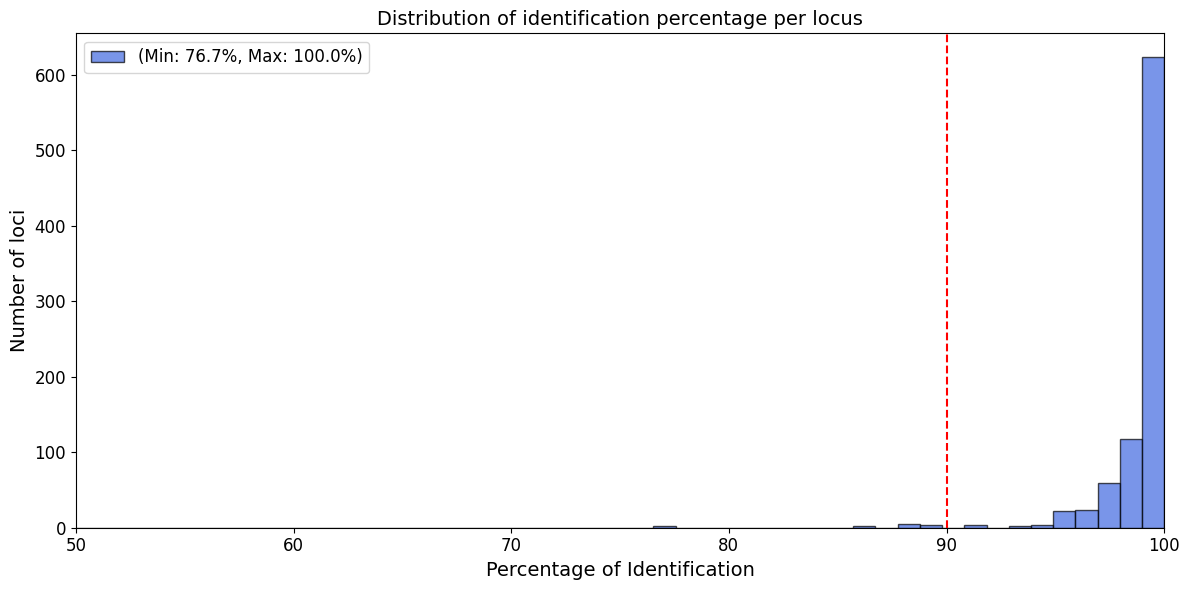

In [107]:
# identification percentage per locus

# Calculate the percentage of missing/identified data for each locus
percent_present_per_locus = 100 - (set_up.isna().sum() / total_isolates) * 100

# Identify loci with more than 10% missing data
loci_above_10_percent_missing = percent_present_per_locus[percent_present_per_locus < 90].index.tolist()
# Save as a text file
with open("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/missing_loci_10%.txt", "w") as file:
    for item in loci_above_10_percent_missing:
        file.write(f"{item}\n")

# Get min and max values
min_kpn = percent_present_per_locus.min()
max_kpn = percent_present_per_locus.max()

# Define bins
bins = np.linspace(50, 100, 50)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(percent_present_per_locus, bins=bins, alpha=0.7, color='royalblue', edgecolor='black', label=f'(Min: {min_kpn:.1f}%, Max: {max_kpn:.1f}%)')

# Enhance the plot
plt.title(f'Distribution of identification percentage per locus', fontsize=14)
plt.xlabel('Percentage of Identification', fontsize=14)
plt.ylabel('Number of loci', fontsize=14)
plt.legend(fontsize=12)

# Add a vertical line at 10% for reference
plt.axvline(x=90, color='red', linestyle='--', label='90% threshold')

# Limit x-axis from 80% to 100%
plt.xlim(50, 100)

# Remove bar labels (if previously set)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the plot
!mkdir -p plot
#plt.savefig("./plots/setup_per_locus_before_filtering_missing_loci.png")

# Show the plot
plt.show()

In [108]:
len(loci_above_10_percent_missing)

12

# Remove the loci with missing data from the type alleles

In [109]:
# open atype alleles with annotations
type_alleles_with_annotations=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/type_alleles/type_alleles_with_length_annotations.tsv', sep='\t')
print(type_alleles_with_annotations.shape)
print(type_alleles_with_annotations.head(1))

(864, 7)
                       locus  \
0  10523-1014809-protein3298   

                                            sequence  length  min_length  \
0  ATGAATACTTTCTCTCTTTTAACTACTGCCTGGCTTCCGGTCCGTT...    1557        1479   

   max_length  gene                                       product  
0        1635  casA  type I-E CRISPR-associated protein Cse1/CasA  


In [110]:
# Filter DataFrame to remove rows with 'locus' in the list
type_alleles_with_annotations_filtered = type_alleles_with_annotations[~type_alleles_with_annotations['locus'].isin(loci_above_10_percent_missing)]
# add alternative tag related to the order on the reference genome 
type_alleles_with_annotations_filtered['alternative_tag'] = [f'SL{str(i).zfill(4)}' for i in range(1, type_alleles_with_annotations_filtered.shape[0] + 1)]
type_alleles_with_annotations_filtered['field order'] = range(1, type_alleles_with_annotations_filtered.shape[0] + 1)
type_alleles_with_annotations_filtered.to_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/type_alleles/type_alleles_with_length_annotations_final.tsv', sep='\t')
type_alleles_with_annotations_filtered.to_excel('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/type_alleles/type_alleles_with_length_annotations_final.xlsx')
type_alleles_with_annotations_filtered

/local/scratch/tmp/ipykernel_1958575/2834236763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_alleles_with_annotations_filtered['alternative_tag'] = [f'SL{str(i).zfill(4)}' for i in range(1, type_alleles_with_annotations_filtered.shape[0] + 1)]
/local/scratch/tmp/ipykernel_1958575/2834236763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_alleles_with_annotations_filtered['field order'] = range(1, type_alleles_with_annotations_filtered.shape[0] + 1)


,locus,sequence,length,min_length,max_length,gene,product,alternative_tag,field order
0,10523-1014809-protein3298,ATGAATACTTTCTCTCTTTTAACTACTGCCTGGCTTCCGGTCCGTT...,1557,1479,1635,casA,type I-E CRISPR-associated protein Cse1/CasA,SL0001,1
1,10523-1014809-protein673,ATGCAAGAGGATATTAACCAGGAGATCACCTTCCGCAAGCTGTCGG...,927,882,972,mauR,Malonate utilization transcriptional regulator,SL0002,2
2,10523-1014809-protein84,ATGACTTATGGCATAAGCACAATTATGGCTTTAAATAATAACTTTA...,150,144,156,NaN,NaN,SL0003,3
3,10523-1014809-protein20,ATGAGGCTCCGCGTTGCGCCCTTTGCGCTGCTAAAACGTCTGGCAT...,726,690,762,mtgA,monofunctional biosynthetic peptidoglycan tran...,SL0004,4
4,10523-1014809-protein1773,ATGCCGATTCAGGTTCTGCCGCCGCAGCTCGCCAACCAGATTGCCG...,1860,1767,1953,mutL,DNA mismatch repair endonuclease MutL,SL0005,5
...,...,...,...,...,...,...,...,...,...
859,10523-1014809-protein3461,ATGAAACGCCTGATGCTAATCGGACCCAGCCAGTGCGGTAAAACCT...,441,420,462,pduV,propanediol utilization protein PduV,SL0848,848
860,10523-1014809-protein753,ATGAGGAAAGCTATTAGCGGCGTACTCACCGCCATTGTCACTCCCT...,885,840,930,NaN,Dihydrodipicolinate synthase,SL0849,849
861,10523-1014809-protein2436,ATGAAAACTCAGGTGGCTGTTTTGCTCAGCGCATTGGCCTTTCAGG...,690,654,726,fimC,"P pilus assembly protein, chaperone PapD",SL0850,850
862,10523-1014809-protein1793,ATGAAACTCCATGAATCACTGGCGCAGAATCACTCCATTCGCCTGC...,468,444,492,ulaC,PTS ascorbate transporter subunit IIA,SL0851,851


In [ ]:
# 10575-KP-317-protein2848 = SL0517
# 13218-SPARK-1483-C1-protein4848 = Kpn2351

# Statistics for the filtered ST147 loci


In [216]:
# filter the loci
set_up = set_up.loc[:, set_up.columns.isin(list(type_alleles_with_annotations_filtered['locus']))]
allele_analysis_filtered = allele_analysis[allele_analysis['Locus'].isin(list(type_alleles_with_annotations_filtered['locus']))]
allele_analysis_filtered = allele_analysis_filtered[~allele_analysis_filtered['Locus'].isin(loci_above_10_percent_missing)]
longest_alleles_filtered = longest_alleles[longest_alleles['locus'].isin(list(type_alleles_with_annotations_filtered['locus']))]
longest_alleles_filtered = longest_alleles_filtered[~longest_alleles_filtered['locus'].isin(loci_above_10_percent_missing)]

print(set_up.shape)
print(allele_analysis_filtered.shape)
print(longest_alleles_filtered.shape)

(1069, 852)
(852, 14)
(852, 3)


# Statistics from BIGSdb

In [217]:
#count the number of unique alleles per locus
unique_alleles_per_locus = set_up.nunique(dropna=True).reset_index()
unique_alleles_per_locus.columns = ["locus", "allele_numbers"]
print(unique_alleles_per_locus.head(1))
# Merge with the frequent_alleles df which has the length data based on the "Locus" column
allele_info_merged = pd.merge(frequent_alleles, unique_alleles_per_locus, on="locus", how="inner") 
print(allele_info_merged.head(1))

                       locus  allele_numbers
0  10523-1014809-protein1820               3
   allele  frequency                      locus  length  min_length  \
0     1.0    0.98971  10523-1014809-protein1011   918.0         873   

   max_length  allele_numbers  
0         963               7  


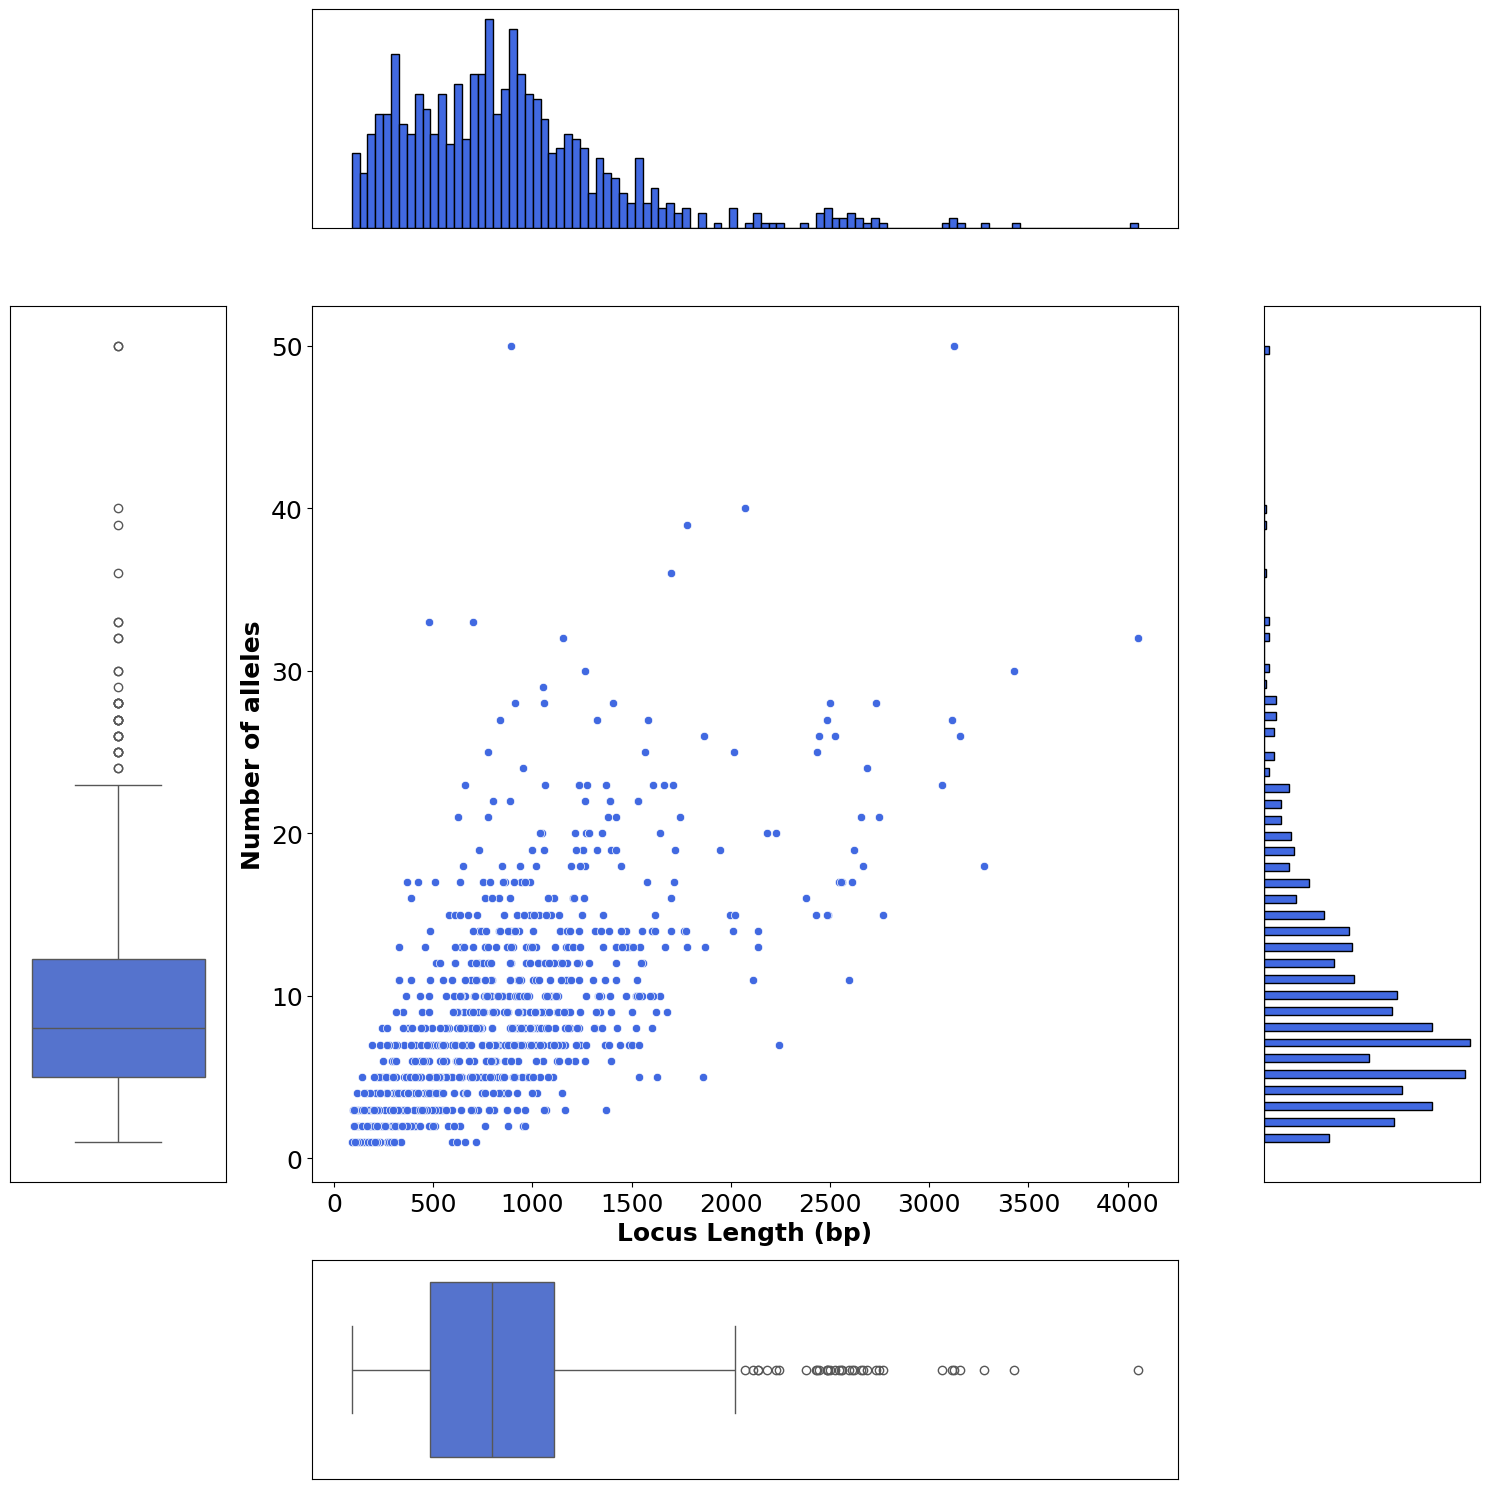

In [218]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Set up the figure with a 3x3 grid of subplots, making the center plot larger
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(3, 3, width_ratios=[1, 4, 1], height_ratios=[1, 4, 1])

# Upper part: distribution of locus lengths (x-axis)
ax1 = fig.add_subplot(gs[0, 1])  # Top-center part
ax1.hist(allele_info_merged['length'], bins=100, edgecolor='black', color='royalblue')
# Remove labels and grid
ax1.set_title('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(False)

# Bottom part: boxplot of locus lengths
ax2 = fig.add_subplot(gs[2, 1])  # Bottom-center part
sns.boxplot(x=allele_info_merged['length'], ax=ax2, color='royalblue')
ax2.set_title('')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(False)

# Left part: boxplot of allele numbers (vertical)
ax4 = fig.add_subplot(gs[1, 0])  # Middle-left part
sns.boxplot(y=allele_info_merged['allele_numbers'], ax=ax4, color='royalblue')
ax4.set_title('')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(False)

# Right part: distribution of allele numbers (horizontal)
ax3 = fig.add_subplot(gs[1, 2])  # Middle-right part
ax3.hist(allele_info_merged['allele_numbers'], bins=100, orientation='horizontal', edgecolor='black', color='royalblue')
ax3.set_title('')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(False)

# Scatter plot in the center for locus length vs allele numbers
ax5 = fig.add_subplot(gs[1, 1])  # Center part
sns.scatterplot(x='length', y='allele_numbers', data=allele_info_merged, ax=ax5, color='royalblue')
ax5.set_xlabel('Locus Length (bp)', fontsize=18, fontweight='bold')  # Bold axis label
ax5.set_ylabel('Number of alleles', fontsize=18, fontweight='bold')  # Bold axis label

# Remove grid and ticks from the side plots
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticks([])
    ax.set_yticks([])

# Increase font size for axis tick labels only in the center plot
ax5.tick_params(axis='both', which='major', labelsize=18)

# Adjust the layout to avoid overlap
plt.tight_layout()
#save
plt.savefig("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/plots/Nubmber_of_alleles_vs_Locus_length_852loci.png")

#display
plt.show()

# Validation dataset

In [136]:
ST147_setup_isolates=pd.read_excel('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/ST147_setup_isolates_before_filtering.xlsx')
all_ST147=pd.read_excel('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/ST147_validation_852.xlsx')
#separate setup from validation isolates
validation = all_ST147[~all_ST147["id"].isin(ST147_setup_isolates["id"])]
setup_isolates = all_ST147[all_ST147["id"].isin(ST147_setup_isolates["id"])]

#set ids as index
validation = validation.set_index(validation.columns[0])
setup_isolates = setup_isolates.set_index(setup_isolates.columns[0])

# remove isolates column
validation = validation.iloc[:, 1:]
setup_isolates = setup_isolates.iloc[:, 1:]


print(validation.shape)
print(validation.head(1))
print(setup_isolates.shape)
print(setup_isolates.head(1))

(1404, 852)
     SL0001  SL0002  SL0003  SL0004  SL0005  SL0006  SL0007  SL0008  SL0009  \
id                                                                            
213     1.0     1.0     3.0     1.0     1.0     1.0     1.0     1.0     1.0   

     SL0010  ...  SL0845  SL0846  SL0847  SL0848  SL0849  SL0850  SL0851  \
id           ...                                                           
213     1.0  ...     1.0     1.0    18.0     1.0     1.0     1.0     5.0   

     SL0852  SL0853  SL0854  
id                           
213     1.0     1.0     1.0  

[1 rows x 852 columns]
(1069, 852)
      SL0001  SL0002  SL0003  SL0004  SL0005  SL0006  SL0007  SL0008  SL0009  \
id                                                                             
1490     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   

      SL0010  ...  SL0845  SL0846  SL0847  SL0848  SL0849  SL0850  SL0851  \
id            ...                                                           


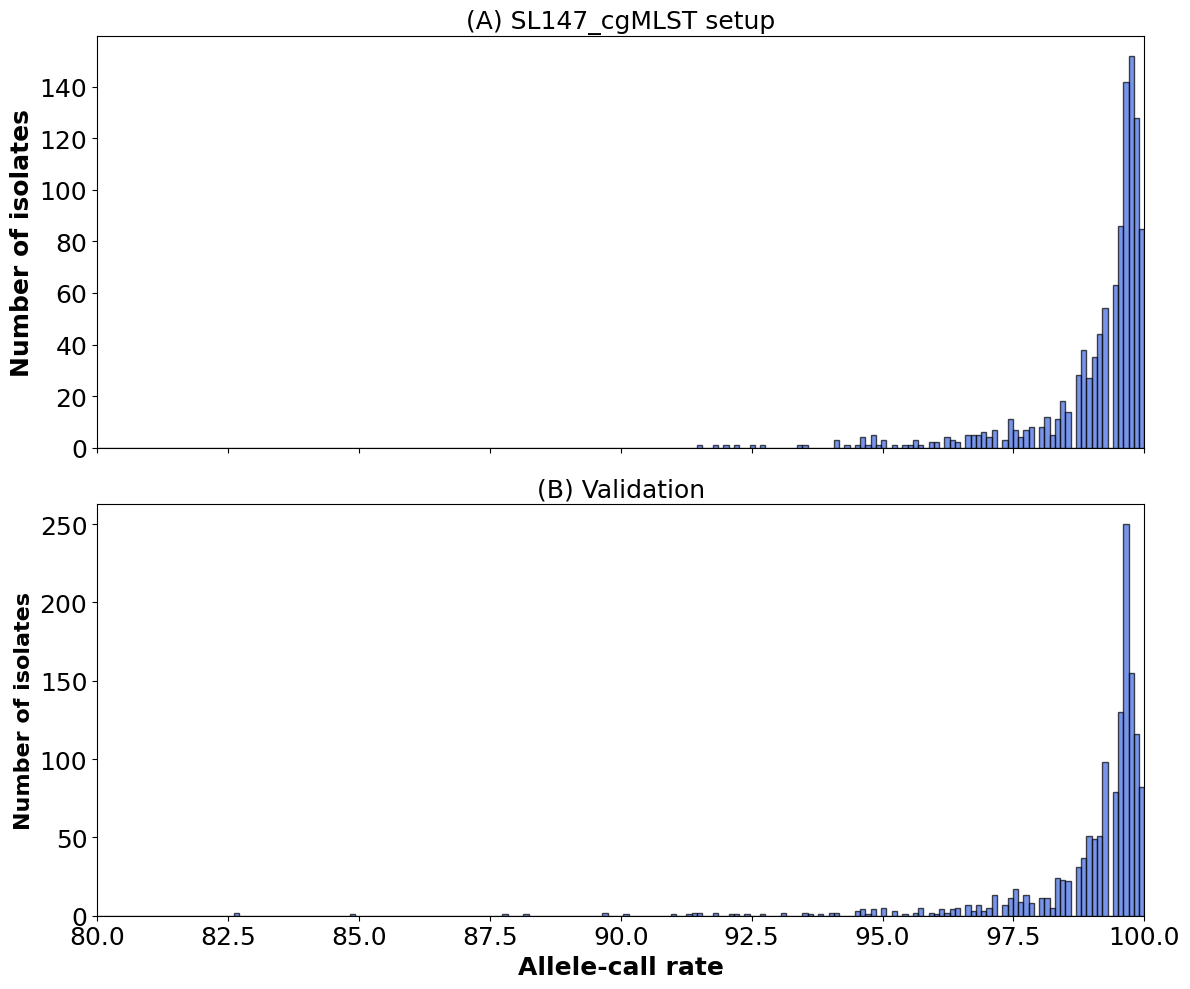

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import os

# First histogram data
total_loci_val = validation.shape[1]
percent_present_per_isolate_val = 100 - (validation.isna().sum(axis=1) / total_loci_val) * 100

min_val = percent_present_per_isolate_val.min()
max_val = percent_present_per_isolate_val.max()
mean_val = percent_present_per_isolate_val.mean()
std_val = percent_present_per_isolate_val.std()

# Second histogram data
total_loci_setup = setup_isolates.shape[1]
percent_present_per_isolate_setup = 100 - (setup_isolates.isna().sum(axis=1) / total_loci_setup) * 100

min_setup = percent_present_per_isolate_setup.min()
max_setup = percent_present_per_isolate_setup.max()
mean_setup = percent_present_per_isolate_setup.mean()
std_setup = percent_present_per_isolate_setup.std()

# Plotting
bins = np.linspace(80, 100, 200)
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top subplot: Setup isolates
axs[0].hist(percent_present_per_isolate_setup, bins=bins, alpha=0.7, color='royalblue', edgecolor='black')
axs[0].set_title('(A) SL147_cgMLST setup', fontsize=18)
axs[0].set_ylabel('Number of isolates', fontsize=18, fontweight='bold')
axs[0].set_xlim(80, 100)
axs[0].tick_params(axis='both', labelsize=18)
# axs[0].spines['top'].set_visible(False)
# axs[0].spines['right'].set_visible(False)

# Bottom subplot: Validation isolates
axs[1].hist(percent_present_per_isolate_val, bins=bins, alpha=0.7, color='royalblue', edgecolor='black')
axs[1].set_title('(B) Validation', fontsize=18)
axs[1].set_xlabel('Allele-call rate', fontsize=18, fontweight='bold')
axs[1].set_ylabel('Number of isolates', fontsize=16, fontweight='bold')
axs[1].set_xlim(80, 100)
axs[1].tick_params(axis='both', labelsize=18)
# axs[1].spines['top'].set_visible(False)
# axs[1].spines['right'].set_visible(False)

plt.tight_layout()

# Save the figure
os.makedirs('plots', exist_ok=True)
plt.savefig("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/plots/setup_+_validation_allele_call_rate_histograms_852.png")
plt.show()

In [220]:
print(mean_setup)
print(std_setup)

99.11746751164925
1.1863714932172036


In [221]:
len(percent_present_per_isolate_setup[percent_present_per_isolate_setup<=95])

24

In [222]:
print(mean_val)
print(std_val)

98.97417505985581
1.5752509584838692


In [223]:
len(percent_present_per_isolate_val[percent_present_per_isolate_val<=95])

42

# Comparison between the different Schemes

In [142]:
setup=pd.read_excel("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/setupSL147_all_852.xlsx")

# Set the first column as the index
setup_df = setup.set_index(setup.columns[0])

# Drop the next two columns (original column 1 and 2)
setup_df = setup_df.drop(setup_df.columns[:1], axis=1)

# Remove MLST loci columns (4233 to 4240)
setup_all = setup_df.drop(setup_df.columns[4233:4240], axis=1)
dropped_columns_setup_all = setup_df.columns[4233:4240].tolist()

# Remove Kpn and ST147 loci (2752+852) 
setup_only_kpsc = setup_df.drop(setup_df.columns[:3604], axis=1)
dropped_columns_setup_only_kpsc = setup_df.columns[:3604].tolist()

# Remove ST147 loci (852) 
setup_with_kpn = setup_all.drop(setup_all.columns[2752:3604], axis=1)
dropped_columns_setup_with_kpn = setup_all.columns[2752:3604].tolist()

In [143]:
dropped_columns_setup_all

['gapA', 'infB', 'mdh', 'pgi', 'phoE', 'rpoB', 'tonB']

In [144]:
dropped_columns_setup_only_kpsc[0]

'Kpn0001'

In [145]:
dropped_columns_setup_only_kpsc[-1]

'SL0854'

In [146]:
dropped_columns_setup_with_kpn[0]

'SL0001'

In [147]:
dropped_columns_setup_with_kpn[-1]

'SL0854'

In [148]:
def pairwise_allelic_distance_matrix(df):

    # Ensure all data is numeric and treat 0 as missing
    numeric_data = df.apply(pd.to_numeric, errors='coerce').fillna(0).values.astype(int)
    num_isolates = numeric_data.shape[0]
    distance_matrix = np.zeros((num_isolates, num_isolates), dtype=int)

    for i in range(num_isolates):
        for j in range(i + 1, num_isolates):
            # Positions where both are not missing (not zero)
            valid = (numeric_data[i] != 0) & (numeric_data[j] != 0)
            # Count of mismatches at valid (non-missing) positions
            mismatches = np.sum((numeric_data[i] != numeric_data[j]) & valid)
            distance_matrix[i, j] = mismatches
            distance_matrix[j, i] = mismatches  # symmetrical

    return pd.DataFrame(distance_matrix, index=df.index, columns=df.index)

In [149]:
########################################## make the pairwise allelic distance matrices
####################### setup
DM_setup_only_kpsc_df = pairwise_allelic_distance_matrix(setup_only_kpsc)

############## with kpn
DM_setup_with_kpn_df = pairwise_allelic_distance_matrix(setup_with_kpn)

############## all
DM_setup_all_df = pairwise_allelic_distance_matrix(setup_all)


In [150]:
print(DM_setup_all_df.shape)
DM_setup_all_df.head(1)

(1069, 1069)


id,1490,1491,3573,3577,4367,4392,4742,6724,7091,7092,...,72067,72530,73842,73845,73854,73874,73875,73900,73912,73918
id,,,,,,,,,,,,,,,,,,,,,
1490,0,304,148,173,431,435,158,484,127,123,...,152,124,125,688,686,111,144,117,218,196


In [151]:
print(DM_setup_with_kpn_df.shape)
DM_setup_with_kpn_df.head(1)

(1069, 1069)


id,1490,1491,3573,3577,4367,4392,4742,6724,7091,7092,...,72067,72530,73842,73845,73854,73874,73875,73900,73912,73918
id,,,,,,,,,,,,,,,,,,,,,
1490,0,250,107,141,364,369,118,399,98,93,...,125,98,91,576,574,92,117,92,177,157


In [152]:
print(DM_setup_only_kpsc_df.shape)
DM_setup_only_kpsc_df.head(1)

(1069, 1069)


id,1490,1491,3573,3577,4367,4392,4742,6724,7091,7092,...,72067,72530,73842,73845,73854,73874,73875,73900,73912,73918
id,,,,,,,,,,,,,,,,,,,,,
1490,0,31,14,15,45,46,18,48,11,12,...,12,12,9,89,88,15,17,9,12,20


In [153]:
setup_cgST=pd.read_excel("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/setupSL147_cgST.xlsx")
setup_cgST

,id,isolate,scgST (scgMLST629_S),LINcode (scgMLST629_S),Phylogroup (scgMLST629_S),Sublineage (scgMLST629_S),Clonal group (scgMLST629_S),ST (MLST)
0,1490,M49,2889;2890,0_0_197_0_4_0_10_0_5_0,Kp1,SL147,CG147,147.0
1,1491,M53,6442;11224,0_0_197_0_17_0_5_0_0_0,Kp1,SL147,CG147,147.0
2,3573,K68-73,3145,0_0_197_0_4_10_0_0_0_0,Kp1,SL147,CG147,147.0
3,3577,50580255,514,0_0_197_0_5_0_0_0_0_0,Kp1,SL147,CG147,147.0
4,4367,KpPA1CR,13075,0_0_197_0_25_0_16_0_0_0,Kp1,SL147,CG147,392.0
...,...,...,...,...,...,...,...,...
1064,73874,8287/22,49323,0_0_197_0_4_1_54_0_0_0,Kp1,SL147,CG147,147.0
1065,73875,9702/22,49324,0_0_197_0_4_1_23_6_0_0,Kp1,SL147,CG147,147.0
1066,73900,HBXY19KP097,49335,0_0_197_0_4_0_155_0_0_0,Kp1,SL147,CG147,147.0
1067,73912,HBXY19KP187,49347,0_0_197_0_4_103_0_0_0_0,Kp1,SL147,CG147,7638.0


In [154]:
cg1_counts = setup_cgST.groupby('ST (MLST)').size()


In [155]:
### merged distance and clonal group info

# Clear index/column names completely to avoid duplication issues
DM_setup_only_kpsc_df.index.name = None
DM_setup_only_kpsc_df.columns.name = None

DM_setup_with_kpn_df.index.name = None
DM_setup_with_kpn_df.columns.name = None

DM_setup_all_df.index.name = None
DM_setup_all_df.columns.name = None



diff_flat_only_kpsc = (
    DM_setup_only_kpsc_df.where(np.triu(np.ones(DM_setup_only_kpsc_df.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
# Explicitly name the columns
diff_flat_only_kpsc.columns = ['isolate1', 'isolate2', 'distance']


diff_flat_with_kpn = (
    DM_setup_with_kpn_df.where(np.triu(np.ones(DM_setup_with_kpn_df.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
# Explicitly name the columns
diff_flat_with_kpn.columns = ['isolate1', 'isolate2', 'distance']


diff_flat_all = (
    DM_setup_all_df.where(np.triu(np.ones(DM_setup_all_df.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
# Explicitly name the columns
diff_flat_all.columns = ['isolate1', 'isolate2', 'distance']


# Ensure all IDs are strings for consistent merging
diff_flat_only_kpsc['isolate1'] = diff_flat_only_kpsc['isolate1'].astype(str)
diff_flat_only_kpsc['isolate2'] = diff_flat_only_kpsc['isolate2'].astype(str)
setup_cgST['id'] = setup_cgST['id'].astype(str)

# Ensure all IDs are strings for consistent merging
diff_flat_with_kpn['isolate1'] = diff_flat_with_kpn['isolate1'].astype(str)
diff_flat_with_kpn['isolate2'] = diff_flat_with_kpn['isolate2'].astype(str)
setup_cgST['id'] = setup_cgST['id'].astype(str)

# Ensure all IDs are strings for consistent merging
diff_flat_all['isolate1'] = diff_flat_all['isolate1'].astype(str)
diff_flat_all['isolate2'] = diff_flat_all['isolate2'].astype(str)
setup_cgST['id'] = setup_cgST['id'].astype(str)



# Perform the merges
merged_only_kpsc = (
    diff_flat_only_kpsc
    .merge(setup_cgST[['id', 'ST (MLST)']], left_on='isolate1', right_on='id')
    .rename(columns={'ST (MLST)': 'cg1'})
    .drop(columns='id')
    .merge(setup_cgST[['id', 'ST (MLST)']], left_on='isolate2', right_on='id')
    .rename(columns={'ST (MLST)': 'cg2'})
    .drop(columns='id')
)

# Perform the merges
merged_with_kpn = (
    diff_flat_with_kpn
    .merge(setup_cgST[['id', 'ST (MLST)']], left_on='isolate1', right_on='id')
    .rename(columns={'ST (MLST)': 'cg1'})
    .drop(columns='id')
    .merge(setup_cgST[['id', 'ST (MLST)']], left_on='isolate2', right_on='id')
    .rename(columns={'ST (MLST)': 'cg2'})
    .drop(columns='id')
)


# Perform the merges
merged_all = (
    diff_flat_all
    .merge(setup_cgST[['id', 'ST (MLST)']], left_on='isolate1', right_on='id')
    .rename(columns={'ST (MLST)': 'cg1'})
    .drop(columns='id')
    .merge(setup_cgST[['id', 'ST (MLST)']], left_on='isolate2', right_on='id')
    .rename(columns={'ST (MLST)': 'cg2'})
    .drop(columns='id')
)

In [156]:
# Prepare clonal group data
clonal_group_order = setup_cgST.set_index('id')
same_clade_df_only_kpsc = merged_only_kpsc[merged_only_kpsc['cg1'] == merged_only_kpsc['cg2']].copy()
same_clade_df_only_kpsc['cg1'] = same_clade_df_only_kpsc['cg1'].astype(int)
same_clade_df_only_kpsc['cg2'] = same_clade_df_only_kpsc['cg2'].astype(int)
cg1_counts = setup_cgST.groupby('ST (MLST)').size()
valid_cg1s = cg1_counts[cg1_counts >= 30].index

same_clade_df_with_kpn = merged_with_kpn[merged_with_kpn['cg1'] == merged_with_kpn['cg2']].copy()
same_clade_df_with_kpn['cg1'] = same_clade_df_with_kpn['cg1'].astype(int)
same_clade_df_with_kpn['cg2'] = same_clade_df_with_kpn['cg2'].astype(int)

same_clade_df_all = merged_all[merged_all['cg1'] == merged_all['cg2']].copy()
same_clade_df_all['cg1'] = same_clade_df_all['cg1'].astype(int)
same_clade_df_all['cg2'] = same_clade_df_all['cg2'].astype(int)

In [157]:
valid_cg1s

Index([147.0, 273.0, 392.0], dtype='float64', name='ST (MLST)')

/local/scratch/tmp/ipykernel_1958575/476800579.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/local/scratch/tmp/ipykernel_1958575/476800579.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=18)
/local/scratch/tmp/ipykernel_1958575/476800579.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/local/scratch/tmp/ipykernel_1958575/476800579.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, fontsize=18)
/local/scratch/tmp/ipykernel_1958575/476800579.py:123: FutureWarning: 

Passing `palette`

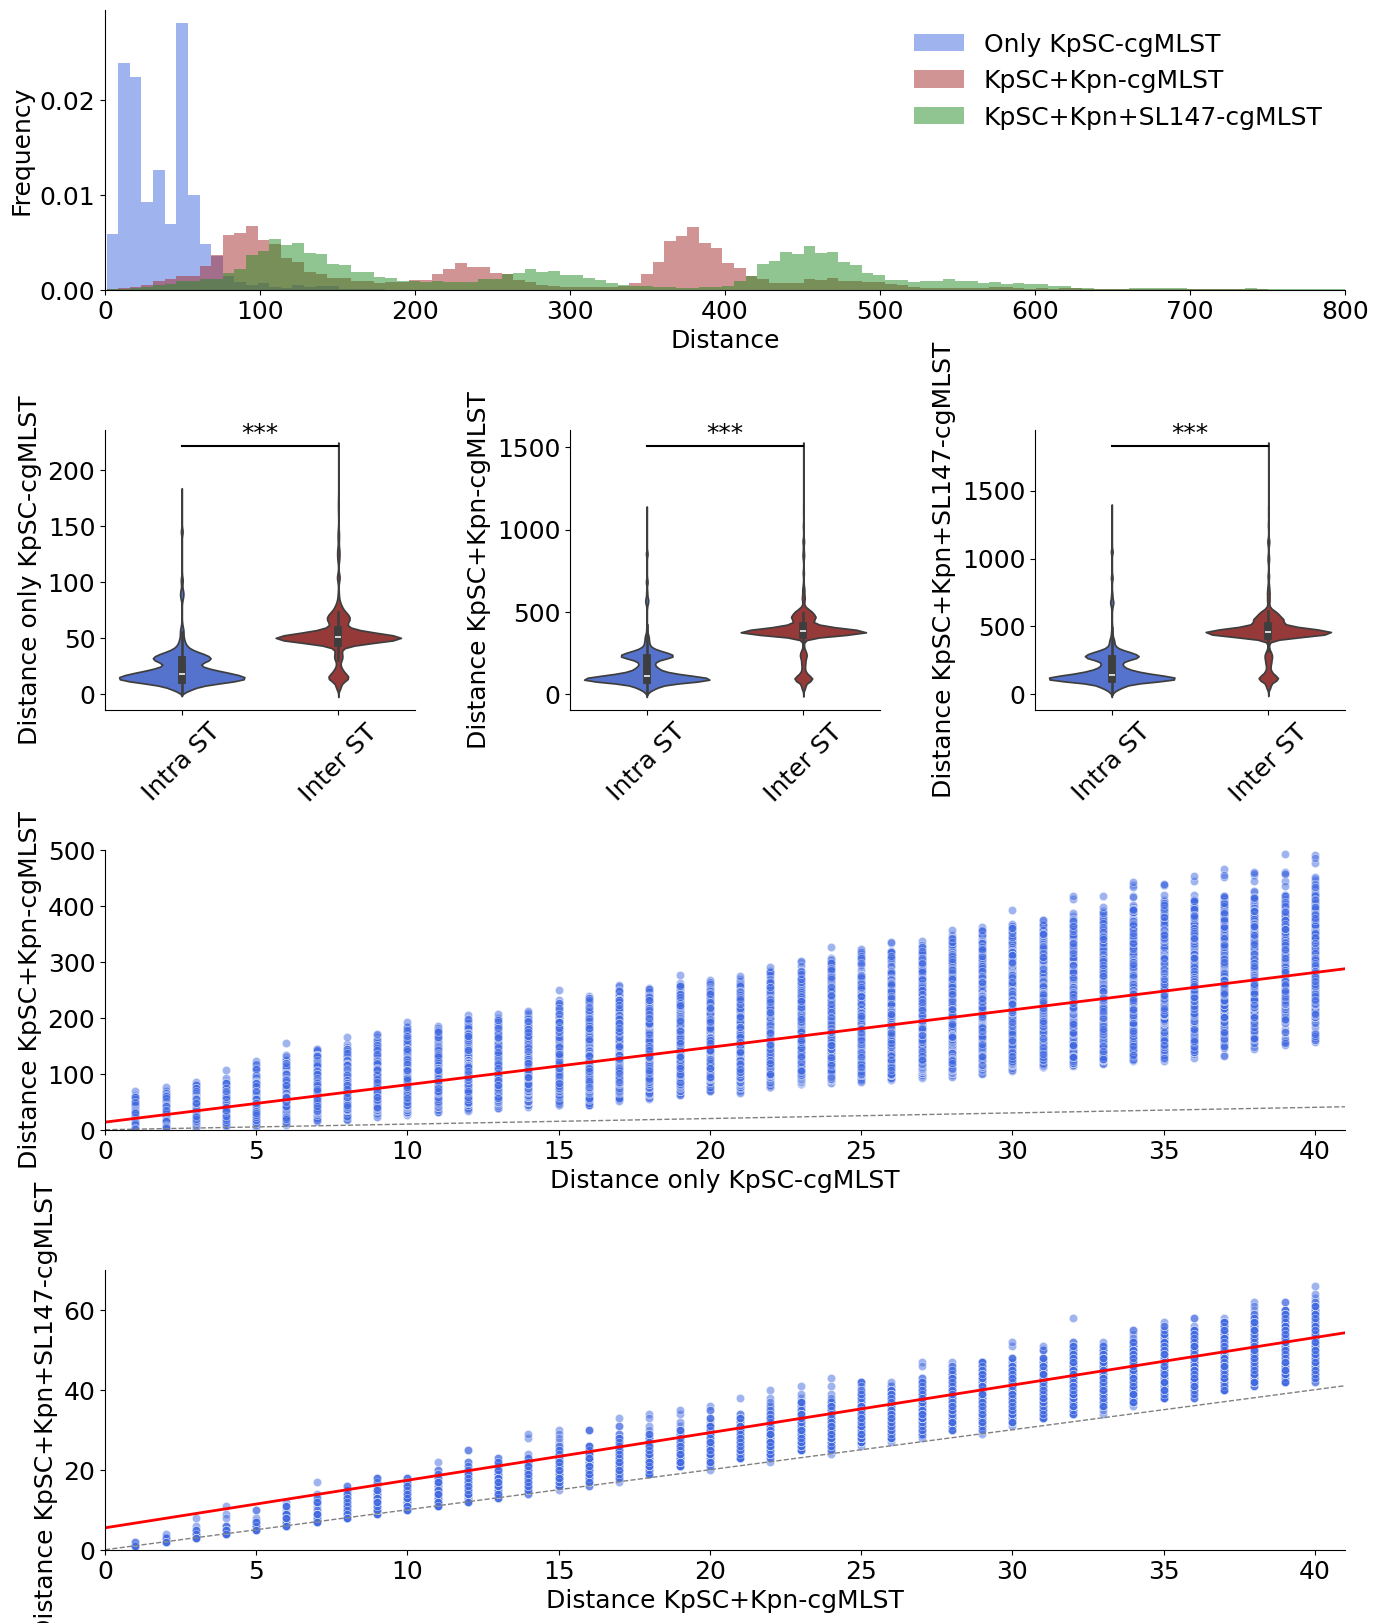

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu
from matplotlib.gridspec import GridSpec
from scipy.stats import linregress

# Convert to NumPy arrays for first plot
distance_matrix_only_kpsc = DM_setup_only_kpsc_df.to_numpy()
distance_matrix_with_kpn = DM_setup_with_kpn_df.to_numpy()
distance_matrix_all = DM_setup_all_df.to_numpy()

# Flatten the matrices, excluding the diagonal
def flatten_matrix(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)]

distances1 = flatten_matrix(distance_matrix_only_kpsc)
distances2 = flatten_matrix(distance_matrix_with_kpn)
distances3 = flatten_matrix(distance_matrix_all)

# Prepare combined figure with specified layout
fig = plt.figure(figsize=(16, 20))
gs = GridSpec(4, 3, height_ratios=[1, 1, 1, 1], width_ratios=[1, 1, 1], hspace=0.5, wspace=0.5)

# First row, first subplot: Histograms
ax1 = fig.add_subplot(gs[0, :])
common_range = (min(distances1.min(), distances2.min(), distances3.min()), 1500)
ax1.hist(distances1, bins=200, alpha=0.5, label='Only KpSC-cgMLST', color='royalblue', density=True, range=common_range)
ax1.hist(distances2, bins=200, alpha=0.5, label='KpSC+Kpn-cgMLST', color='brown', density=True, range=common_range)
ax1.hist(distances3, bins=200, alpha=0.5, label='KpSC+Kpn+SL147-cgMLST', color='forestgreen', density=True, range=common_range)
ax1.set_xlabel('Distance', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.set_xlim(0, 800)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Create legend without borders
ax1.legend(loc='upper right', frameon=False, fontsize=18)

# second row, first subplot: Violin plot
ax2 = fig.add_subplot(gs[1, 0])
intra_df = merged_only_kpsc[merged_only_kpsc['cg1'] == merged_only_kpsc['cg2']].copy()
intra_df['Type'] = 'Intra ST'
inter_df = merged_only_kpsc[merged_only_kpsc['cg1'] != merged_only_kpsc['cg2']].copy()
inter_df['Type'] = 'Inter ST'
combined_df = pd.concat([intra_df, inter_df], ignore_index=True)
u_stat, p_val = mannwhitneyu(
    intra_df['distance'],
    inter_df['distance'],
    alternative='two-sided'
)
sns.violinplot(
    ax=ax2,
    data=combined_df,
    x='Type',
    y='distance',
    palette={'Intra ST': 'royalblue', 'Inter ST': 'brown'},
    inner='box'
)
y_max = combined_df['distance'].max()
line_y = y_max + 0.5
text_y = y_max + 0.7
x1, x2 = 0, 1
ax2.plot([x1, x1, x2, x2], [line_y, line_y + 0.1, line_y + 0.1, line_y], lw=1.5, c='black')
p_label = "***" if p_val < 0.001 else f"p = {p_val:.2f}"
ax2.text((x1 + x2) / 2, text_y, p_label, ha='center', va='bottom', fontsize=18)
ax2.set_ylabel('Distance only KpSC-cgMLST', fontsize=18)
#ax2.set_ylim(0, 2000)
ax2.set_xlabel('')
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=18)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# second row, second subplot: Violin plot
ax3 = fig.add_subplot(gs[1, 1])
intra_df = merged_with_kpn[merged_with_kpn['cg1'] == merged_with_kpn['cg2']].copy()
intra_df['Type'] = 'Intra ST'
inter_df = merged_with_kpn[merged_with_kpn['cg1'] != merged_with_kpn['cg2']].copy()
inter_df['Type'] = 'Inter ST'
combined_df = pd.concat([intra_df, inter_df], ignore_index=True)
u_stat, p_val = mannwhitneyu(
    intra_df['distance'],
    inter_df['distance'],
    alternative='two-sided'
)
sns.violinplot(
    ax=ax3,
    data=combined_df,
    x='Type',
    y='distance',
    palette={'Intra ST': 'royalblue', 'Inter ST': 'brown'},
    inner='box'
)
y_max = combined_df['distance'].max()
line_y = y_max + 0.5
text_y = y_max + 0.7
x1, x2 = 0, 1
ax3.plot([x1, x1, x2, x2], [line_y, line_y + 0.1, line_y + 0.1, line_y], lw=1.5, c='black')
p_label = "***" if p_val < 0.001 else f"p = {p_val:.2f}"
ax3.text((x1 + x2) / 2, text_y, p_label, ha='center', va='bottom', fontsize=18)
ax3.set_ylabel('Distance KpSC+Kpn-cgMLST', fontsize=18)
#ax3.set_ylim(0, 2000)
ax3.set_xlabel('')
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, fontsize=18)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# second row, third subplot: Violin plot
ax4 = fig.add_subplot(gs[1, 2])
intra_df = merged_all[merged_all['cg1'] == merged_all['cg2']].copy()
intra_df['Type'] = 'Intra ST'
inter_df = merged_all[merged_all['cg1'] != merged_all['cg2']].copy()
inter_df['Type'] = 'Inter ST'
combined_df = pd.concat([intra_df, inter_df], ignore_index=True)
u_stat, p_val = mannwhitneyu(
    intra_df['distance'],
    inter_df['distance'],
    alternative='two-sided'
)
sns.violinplot(
    ax=ax4,
    data=combined_df,
    x='Type',
    y='distance',
    palette={'Intra ST': 'royalblue', 'Inter ST': 'brown'},
    inner='box'
)
y_max = combined_df['distance'].max()
line_y = y_max + 0.5
text_y = y_max + 0.7
x1, x2 = 0, 1
ax4.plot([x1, x1, x2, x2], [line_y, line_y + 0.1, line_y + 0.1, line_y], lw=1.5, c='black')
p_label = "***" if p_val < 0.001 else f"p = {p_val:.2f}"
ax4.text((x1 + x2) / 2, text_y, p_label, ha='center', va='bottom', fontsize=18)
ax4.set_ylabel('Distance KpSC+Kpn+SL147-cgMLST', fontsize=18)
#ax4.set_ylim(0, 2000)
ax4.set_xlabel('')
ax4.tick_params(axis='both', which='major', labelsize=18)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, fontsize=18)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# 3rd row, full-width subplot: Scatter plot
ax5 = fig.add_subplot(gs[2, :])
threshold = 40
mask = distances1 <= threshold
filtered_distances1 = distances1[mask]
filtered_distances2 = distances2[mask]
ax5.scatter(
    filtered_distances1, 
    filtered_distances2, 
    alpha=0.5, 
    color='royalblue', 
    edgecolors='w', 
    linewidth=0.5
)

# Calculate linear regression
slope1, intercept, _, _, _ = linregress(distances1,distances2)

# Plot the linear regression line
x_values = np.array([0, 41])
ax5.plot(
    x_values, 
    slope1 * x_values + intercept, 
    color='red', 
    linewidth=2, 
    label='_nolegend_'
)

ax5.set_xlabel('Distance only KpSC-cgMLST', fontsize=18)
ax5.set_ylabel('Distance KpSC+Kpn-cgMLST', fontsize=18)
ax5.set_ylim(0, 500)
ax5.set_xlim(0, 41)
ax5.tick_params(axis='both', which='major', labelsize=18)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
# Set the limits for the line
x_min, x_max = ax5.get_xlim()
y_min, y_max = ax5.get_ylim()

# The line should pass through (0, 0) and have a slope of 1 (y = x)
# It needs to be extended, so let's make it cover from min to max limits
ax5.plot(
    [x_min, x_max], 
    [x_min, x_max], 
    linestyle='--', 
    color='gray', 
    linewidth=1
)

# 4th row, full-width subplot: Scatter plot
ax6 = fig.add_subplot(gs[3, :])
threshold = 40
mask = distances2 <= threshold
filtered_distances2 = distances2[mask]
filtered_distances3 = distances3[mask]
ax6.scatter(
    filtered_distances2, 
    filtered_distances3, 
    alpha=0.5, 
    color='royalblue', 
    edgecolors='w', 
    linewidth=0.5
)

# Calculate linear regression
slope2, intercept, _, _, _ = linregress(distances2,distances3)

# Plot the linear regression line
x_values = np.array([0, 41])
ax6.plot(
    x_values, 
    slope2 * x_values + intercept, 
    color='red', 
    linewidth=2, 
    label='_nolegend_'
)

ax6.set_xlabel('Distance KpSC+Kpn-cgMLST', fontsize=18)
ax6.set_ylabel('Distance KpSC+Kpn+SL147-cgMLST', fontsize=18)
ax6.set_ylim(0, 70)
ax6.set_xlim(0, 41)
ax6.tick_params(axis='both', which='major', labelsize=18)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)

# Set the limits for the line
x_min, x_max = ax6.get_xlim()
y_min, y_max = ax6.get_ylim()

# The line should pass through (0, 0) and have a slope of 1 (y = x)
# It needs to be extended, so let's make it cover from min to max limits
ax6.plot(
    [x_min, x_max], 
    [x_min, x_max], 
    linestyle='--', 
    color='gray', 
    linewidth=1
)

plt.tight_layout()
plt.savefig("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/plots/combined_subplots_histogram_setup.png", dpi=600)
plt.show()

In [159]:
slope1

6.679364100162442

In [160]:
slope2

1.1892278874400963

# Validation dataset

In [161]:
# open all allelic composition data for all the SL147 bigsdb isolates
all_valid=pd.read_excel("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/ST147_all_schemes_852.xlsx")

# Remove set-up isolates
ST147_setup_isolates=pd.read_excel('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/ST147_setup_isolates_before_filtering.xlsx')
valid = all_valid[~all_valid["id"].isin(ST147_setup_isolates["id"])]

# Set the first column as the index
valid_df = valid.set_index(valid.columns[0])

# Drop the next two columns (original column 1 and 2)
valid_df = valid_df.drop(valid_df.columns[:1], axis=1)

# Remove MLST loci columns (629 to 635)
valid_all = valid_df.drop(valid_df.columns[4233:4240], axis=1)
dropped_columns_valid_all = valid_df.columns[4233:4240].tolist()

# Remove Kpn and ST147 loci (2752+852) 
valid_only_kpsc = valid_df.drop(valid_df.columns[:3604], axis=1)
dropped_columns_valid_only_kpsc = valid_df.columns[:3604].tolist()

# Remove ST147 loci (852) 
valid_with_kpn = valid_all.drop(valid_all.columns[2752:3604], axis=1)
dropped_columns_valid_with_kpn = valid_all.columns[2752:3604].tolist()


In [162]:
dropped_columns_valid_all

['gapA', 'infB', 'mdh', 'pgi', 'phoE', 'rpoB', 'tonB']

In [163]:
dropped_columns_valid_with_kpn[0]

'SL0001'

In [164]:
dropped_columns_valid_with_kpn[-1]

'SL0854'

In [165]:
dropped_columns_valid_only_kpsc[0]

'Kpn0001'

In [166]:
dropped_columns_valid_only_kpsc[-1]

'SL0854'

In [167]:
########################################## make the pairwise allelic distance matrices
####################### setup
DM_valid_only_kpsc_df = pairwise_allelic_distance_matrix(valid_only_kpsc)

############## with kpn
DM_valid_with_kpn_df = pairwise_allelic_distance_matrix(valid_with_kpn)

############## all
DM_valid_all_df = pairwise_allelic_distance_matrix(valid_all)

In [168]:
print(DM_valid_all_df.shape)
DM_valid_all_df.head(1)

(1404, 1404)


id,213,1493,3031,3142,3572,4369,4395,4408,7471,9744,...,76399,76400,76402,76403,76437,76546,76550,76554,79731,79732
id,,,,,,,,,,,,,,,,,,,,,
213,0,431,409,52,475,439,436,438,438,508,...,453,465,448,461,449,420,566,453,463,460


In [169]:
print(DM_valid_with_kpn_df.shape)
DM_valid_with_kpn_df.head(1)

(1404, 1404)


id,213,1493,3031,3142,3572,4369,4395,4408,7471,9744,...,76399,76400,76402,76403,76437,76546,76550,76554,79731,79732
id,,,,,,,,,,,,,,,,,,,,,
213,0,357,346,46,388,363,360,362,357,432,...,388,399,388,395,372,351,488,381,387,383


In [170]:
print(DM_valid_only_kpsc_df.shape)
DM_valid_only_kpsc_df.head(1)

(1404, 1404)


id,213,1493,3031,3142,3572,4369,4395,4408,7471,9744,...,76399,76400,76402,76403,76437,76546,76550,76554,79731,79732
id,,,,,,,,,,,,,,,,,,,,,
213,0,40,39,6,48,47,47,47,43,57,...,49,51,52,52,51,46,77,47,48,46


In [171]:
valid_cgST=pd.read_excel("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/validation_cgST.xlsx")

valid_cgST = valid_cgST[~valid_cgST["id"].isin(ST147_setup_isolates["id"])]
valid_cgST

,id,isolate,scgST (scgMLST629_S),LINcode (scgMLST629_S),Phylogroup (scgMLST629_S),Sublineage (scgMLST629_S),Clonal group (scgMLST629_S),ST (MLST)
0,213,K45-67,3108,0_0_197_0_0_0_0_0_0_0,Kp1,SL147,CG147,273.0
3,1493,M55,2889;2890,0_0_197_0_4_0_10_0_5_0,Kp1,SL147,CG147,147.0
4,3031,K307An,9786;11235,0_0_197_0_4_0_29_0_0_0,Kp1,SL147,CG147,147.0
5,3142,U_13792_2,9815;11237,0_0_197_0_0_0_0_5_0_0,Kp1,SL147,CG147,273.0
6,3572,K68-18,9830;11240,0_0_197_0_4_10_1_1_0_0,Kp1,SL147,CG147,147.0
...,...,...,...,...,...,...,...,...
2468,76546,C3P5A,50729,0_0_197_0_25_0_44_0_0_0,Kp1,SL147,CG147,392.0
2469,76550,CC3P2E,50733,0_0_197_4_1_0_0_0_0_0,Kp1,SL147,CG10568,147.0
2470,76554,2310003848,50582,0_0_197_0_4_1_23_8_0_0,Kp1,SL147,CG147,8278.0
2471,79731,2025JQ-00017,52138,0_0_197_0_4_1_23_0_11_0,Kp1,SL147,CG147,8324.0


In [172]:
### merged distance and clonal group info

# Clear index/column names completely to avoid duplication issues
DM_valid_only_kpsc_df.index.name = None
DM_valid_only_kpsc_df.columns.name = None

DM_valid_with_kpn_df.index.name = None
DM_valid_with_kpn_df.columns.name = None

DM_valid_all_df.index.name = None
DM_valid_all_df.columns.name = None



diff_flat_only_kpsc = (
    DM_valid_only_kpsc_df.where(np.triu(np.ones(DM_valid_only_kpsc_df.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
# Explicitly name the columns
diff_flat_only_kpsc.columns = ['isolate1', 'isolate2', 'distance']


diff_flat_with_kpn = (
    DM_valid_with_kpn_df.where(np.triu(np.ones(DM_valid_with_kpn_df.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
# Explicitly name the columns
diff_flat_with_kpn.columns = ['isolate1', 'isolate2', 'distance']


diff_flat_all = (
    DM_valid_all_df.where(np.triu(np.ones(DM_valid_all_df.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
# Explicitly name the columns
diff_flat_all.columns = ['isolate1', 'isolate2', 'distance']


# Ensure all IDs are strings for consistent merging
diff_flat_only_kpsc['isolate1'] = diff_flat_only_kpsc['isolate1'].astype(str)
diff_flat_only_kpsc['isolate2'] = diff_flat_only_kpsc['isolate2'].astype(str)
valid_cgST['id'] = valid_cgST['id'].astype(str)

# Ensure all IDs are strings for consistent merging
diff_flat_with_kpn['isolate1'] = diff_flat_with_kpn['isolate1'].astype(str)
diff_flat_with_kpn['isolate2'] = diff_flat_with_kpn['isolate2'].astype(str)
valid_cgST['id'] = valid_cgST['id'].astype(str)

# Ensure all IDs are strings for consistent merging
diff_flat_all['isolate1'] = diff_flat_all['isolate1'].astype(str)
diff_flat_all['isolate2'] = diff_flat_all['isolate2'].astype(str)
valid_cgST['id'] = valid_cgST['id'].astype(str)


# Perform the merges
merged_only_kpsc = (
    diff_flat_only_kpsc
    .merge(valid_cgST[['id', 'ST (MLST)']], left_on='isolate1', right_on='id')
    .rename(columns={'ST (MLST)': 'cg1'})
    .drop(columns='id')
    .merge(valid_cgST[['id', 'ST (MLST)']], left_on='isolate2', right_on='id')
    .rename(columns={'ST (MLST)': 'cg2'})
    .drop(columns='id')
)

# Perform the merges
merged_with_kpn = (
    diff_flat_with_kpn
    .merge(valid_cgST[['id', 'ST (MLST)']], left_on='isolate1', right_on='id')
    .rename(columns={'ST (MLST)': 'cg1'})
    .drop(columns='id')
    .merge(valid_cgST[['id', 'ST (MLST)']], left_on='isolate2', right_on='id')
    .rename(columns={'ST (MLST)': 'cg2'})
    .drop(columns='id')
)


# Perform the merges
merged_all = (
    diff_flat_all
    .merge(valid_cgST[['id', 'ST (MLST)']], left_on='isolate1', right_on='id')
    .rename(columns={'ST (MLST)': 'cg1'})
    .drop(columns='id')
    .merge(valid_cgST[['id', 'ST (MLST)']], left_on='isolate2', right_on='id')
    .rename(columns={'ST (MLST)': 'cg2'})
    .drop(columns='id')
)

In [173]:
# Prepare clonal group data
clonal_group_order = valid_cgST.set_index('id')
same_clade_df_only_kpsc = merged_only_kpsc[merged_only_kpsc['cg1'] == merged_only_kpsc['cg2']].copy()
same_clade_df_only_kpsc['cg1'] = same_clade_df_only_kpsc['cg1'].astype(int)
same_clade_df_only_kpsc['cg2'] = same_clade_df_only_kpsc['cg2'].astype(int)
cg1_counts = valid_cgST.groupby('ST (MLST)').size()
valid_cg1s = cg1_counts[cg1_counts >= 30].index

same_clade_df_with_kpn = merged_with_kpn[merged_with_kpn['cg1'] == merged_with_kpn['cg2']].copy()
same_clade_df_with_kpn['cg1'] = same_clade_df_with_kpn['cg1'].astype(int)
same_clade_df_with_kpn['cg2'] = same_clade_df_with_kpn['cg2'].astype(int)

same_clade_df_all = merged_all[merged_all['cg1'] == merged_all['cg2']].copy()
same_clade_df_all['cg1'] = same_clade_df_all['cg1'].astype(int)
same_clade_df_all['cg2'] = same_clade_df_all['cg2'].astype(int)

In [174]:
valid_cg1s

Index([147.0, 273.0, 392.0, 4843.0], dtype='float64', name='ST (MLST)')

/local/scratch/tmp/ipykernel_1958575/3563781084.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/local/scratch/tmp/ipykernel_1958575/3563781084.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=18)
/local/scratch/tmp/ipykernel_1958575/3563781084.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/local/scratch/tmp/ipykernel_1958575/3563781084.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, fontsize=18)
/local/scratch/tmp/ipykernel_1958575/3563781084.py:123: FutureWarning: 

Passing `pal

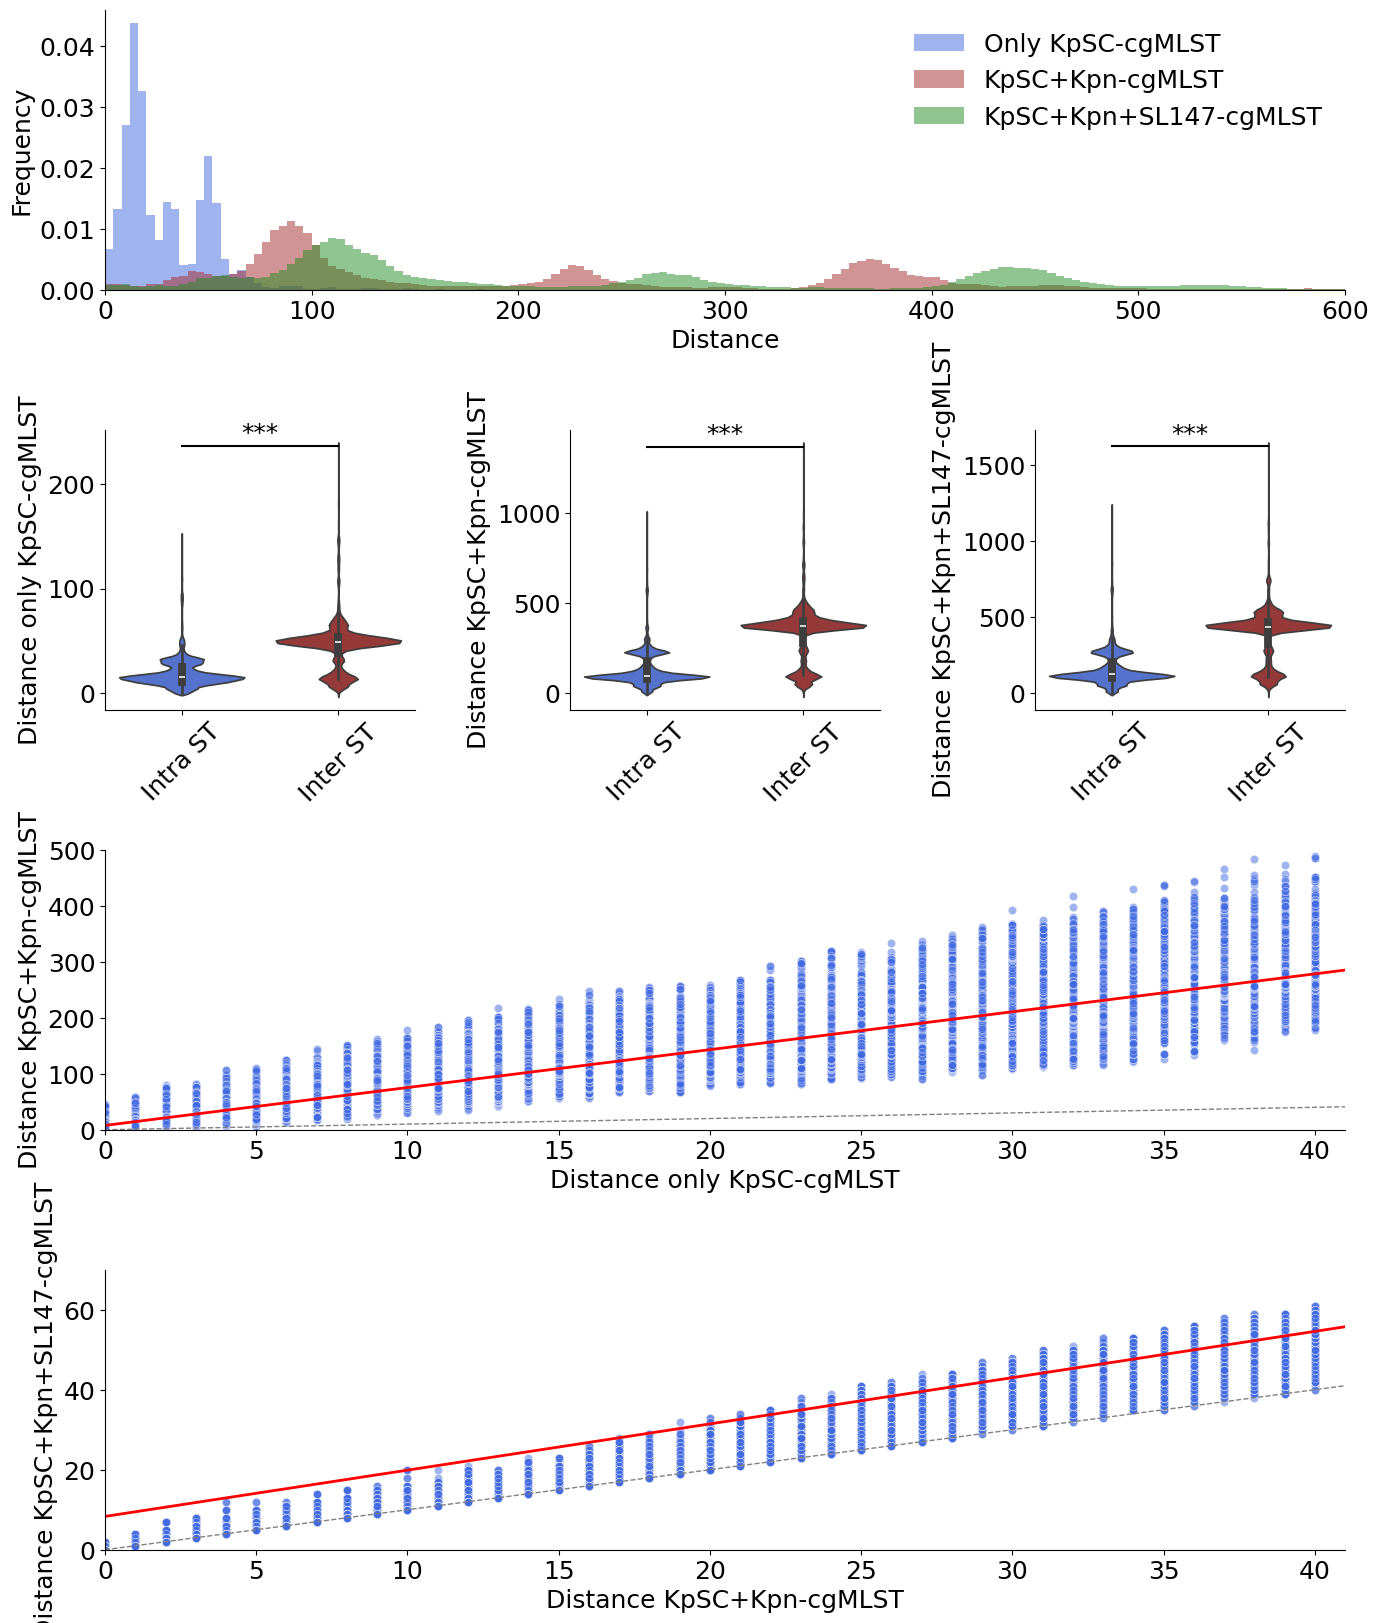

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu
from matplotlib.gridspec import GridSpec
from scipy.stats import linregress

# Convert to NumPy arrays for first plot
distance_matrix_only_kpsc = DM_valid_only_kpsc_df.to_numpy()
distance_matrix_with_kpn = DM_valid_with_kpn_df.to_numpy()
distance_matrix_all = DM_valid_all_df.to_numpy()

# Flatten the matrices, excluding the diagonal
def flatten_matrix(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)]

distances1 = flatten_matrix(distance_matrix_only_kpsc)
distances2 = flatten_matrix(distance_matrix_with_kpn)
distances3 = flatten_matrix(distance_matrix_all)

# Prepare combined figure with specified layout
fig = plt.figure(figsize=(16, 20))
gs = GridSpec(4, 3, height_ratios=[1, 1, 1, 1], width_ratios=[1, 1, 1], hspace=0.5, wspace=0.5)

# First row, first subplot: Histograms
ax1 = fig.add_subplot(gs[0, :])
common_range = (min(distances1.min(), distances2.min(), distances3.min()), 1600)
ax1.hist(distances1, bins=400, alpha=0.5, label='Only KpSC-cgMLST', color='royalblue', density=True, range=common_range)
ax1.hist(distances2, bins=400, alpha=0.5, label='KpSC+Kpn-cgMLST', color='brown', density=True, range=common_range)
ax1.hist(distances3, bins=400, alpha=0.5, label='KpSC+Kpn+SL147-cgMLST', color='forestgreen', density=True, range=common_range)
ax1.set_xlabel('Distance', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.set_xlim(0, 600)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Create legend without borders
ax1.legend(loc='upper right', frameon=False, fontsize=18)

# second row, first subplot: Violin plot
ax2 = fig.add_subplot(gs[1, 0])
intra_df = merged_only_kpsc[merged_only_kpsc['cg1'] == merged_only_kpsc['cg2']].copy()
intra_df['Type'] = 'Intra ST'
inter_df = merged_only_kpsc[merged_only_kpsc['cg1'] != merged_only_kpsc['cg2']].copy()
inter_df['Type'] = 'Inter ST'
combined_df = pd.concat([intra_df, inter_df], ignore_index=True)
u_stat, p_val = mannwhitneyu(
    intra_df['distance'],
    inter_df['distance'],
    alternative='two-sided'
)
sns.violinplot(
    ax=ax2,
    data=combined_df,
    x='Type',
    y='distance',
    palette={'Intra ST': 'royalblue', 'Inter ST': 'brown'},
    inner='box'
)
y_max = combined_df['distance'].max()
line_y = y_max + 0.5
text_y = y_max + 0.7
x1, x2 = 0, 1
ax2.plot([x1, x1, x2, x2], [line_y, line_y + 0.1, line_y + 0.1, line_y], lw=1.5, c='black')
p_label = "***" if p_val < 0.001 else f"p = {p_val:.2f}"
ax2.text((x1 + x2) / 2, text_y, p_label, ha='center', va='bottom', fontsize=18)
ax2.set_ylabel('Distance only KpSC-cgMLST', fontsize=18)
#ax2.set_ylim(0, 2000)
ax2.set_xlabel('')
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=18)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# second row, second subplot: Violin plot
ax3 = fig.add_subplot(gs[1, 1])
intra_df = merged_with_kpn[merged_with_kpn['cg1'] == merged_with_kpn['cg2']].copy()
intra_df['Type'] = 'Intra ST'
inter_df = merged_with_kpn[merged_with_kpn['cg1'] != merged_with_kpn['cg2']].copy()
inter_df['Type'] = 'Inter ST'
combined_df = pd.concat([intra_df, inter_df], ignore_index=True)
u_stat, p_val = mannwhitneyu(
    intra_df['distance'],
    inter_df['distance'],
    alternative='two-sided'
)
sns.violinplot(
    ax=ax3,
    data=combined_df,
    x='Type',
    y='distance',
    palette={'Intra ST': 'royalblue', 'Inter ST': 'brown'},
    inner='box'
)
y_max = combined_df['distance'].max()
line_y = y_max + 0.5
text_y = y_max + 0.7
x1, x2 = 0, 1
ax3.plot([x1, x1, x2, x2], [line_y, line_y + 0.1, line_y + 0.1, line_y], lw=1.5, c='black')
p_label = "***" if p_val < 0.001 else f"p = {p_val:.2f}"
ax3.text((x1 + x2) / 2, text_y, p_label, ha='center', va='bottom', fontsize=18)
ax3.set_ylabel('Distance KpSC+Kpn-cgMLST', fontsize=18)
#ax3.set_ylim(0, 2000)
ax3.set_xlabel('')
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, fontsize=18)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# second row, third subplot: Violin plot
ax4 = fig.add_subplot(gs[1, 2])
intra_df = merged_all[merged_all['cg1'] == merged_all['cg2']].copy()
intra_df['Type'] = 'Intra ST'
inter_df = merged_all[merged_all['cg1'] != merged_all['cg2']].copy()
inter_df['Type'] = 'Inter ST'
combined_df = pd.concat([intra_df, inter_df], ignore_index=True)
u_stat, p_val = mannwhitneyu(
    intra_df['distance'],
    inter_df['distance'],
    alternative='two-sided'
)
sns.violinplot(
    ax=ax4,
    data=combined_df,
    x='Type',
    y='distance',
    palette={'Intra ST': 'royalblue', 'Inter ST': 'brown'},
    inner='box'
)
y_max = combined_df['distance'].max()
line_y = y_max + 0.5
text_y = y_max + 0.7
x1, x2 = 0, 1
ax4.plot([x1, x1, x2, x2], [line_y, line_y + 0.1, line_y + 0.1, line_y], lw=1.5, c='black')
p_label = "***" if p_val < 0.001 else f"p = {p_val:.2f}"
ax4.text((x1 + x2) / 2, text_y, p_label, ha='center', va='bottom', fontsize=18)
ax4.set_ylabel('Distance KpSC+Kpn+SL147-cgMLST', fontsize=18)
#ax4.set_ylim(0, 2000)
ax4.set_xlabel('')
ax4.tick_params(axis='both', which='major', labelsize=18)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, fontsize=18)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)


# # third row,  first subplot: Boxplot
# ax5 = fig.add_subplot(gs[2, 0])
# filtered_data = same_clade_df_only_kpsc[same_clade_df_only_kpsc['cg1'].isin(valid_cg1s)]
# variance_by_cg = filtered_data.groupby('cg1')['distance'].var().sort_values(ascending=False)
# sorted_filtered_data = filtered_data[filtered_data['cg1'].isin(variance_by_cg.index)]
# sns.boxplot(
#     ax=ax5, 
#     data=sorted_filtered_data, 
#     x='cg1', 
#     y='distance', 
#     order=variance_by_cg.index, 
#     color='royalblue'
# )
# y_max = sorted_filtered_data['distance'].max()
# offset = (y_max - sorted_filtered_data['distance'].min()) * 0.05
# ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, fontsize=18)
# ax5.set_yticklabels(ax5.get_yticklabels(), fontsize=18)
# ax5.set_xlabel('ST', fontsize=18)
# ax5.set_ylabel('Distance only KpSC', fontsize=18)
# sns.despine(ax=ax5, top=True, right=True)


# # third row, second subplot: Boxplot
# ax6 = fig.add_subplot(gs[2, 1])
# filtered_data = same_clade_df_with_kpn[same_clade_df_with_kpn['cg1'].isin(valid_cg1s)]
# variance_by_cg = filtered_data.groupby('cg1')['distance'].var().sort_values(ascending=False)
# sorted_filtered_data = filtered_data[filtered_data['cg1'].isin(variance_by_cg.index)]
# sns.boxplot(
#     ax=ax6, 
#     data=sorted_filtered_data, 
#     x='cg1', 
#     y='distance', 
#     order=variance_by_cg.index, 
#     color='royalblue'
# )
# y_max = sorted_filtered_data['distance'].max()
# offset = (y_max - sorted_filtered_data['distance'].min()) * 0.05
# ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, fontsize=18)
# ax6.set_yticklabels(ax6.get_yticklabels(), fontsize=18)
# ax6.set_xlabel('ST', fontsize=18)
# ax6.set_ylabel('Distance with Kpn', fontsize=18)
# sns.despine(ax=ax6, top=True, right=True)

# # third row, third subplot: Boxplot
# ax7 = fig.add_subplot(gs[2, 2])
# filtered_data = same_clade_df_all[same_clade_df_all['cg1'].isin(valid_cg1s)]
# variance_by_cg = filtered_data.groupby('cg1')['distance'].var().sort_values(ascending=False)
# sorted_filtered_data = filtered_data[filtered_data['cg1'].isin(variance_by_cg.index)]
# sns.boxplot(
#     ax=ax7, 
#     data=sorted_filtered_data, 
#     x='cg1', 
#     y='distance', 
#     order=variance_by_cg.index, 
#     color='royalblue'
# )
# y_max = sorted_filtered_data['distance'].max()
# offset = (y_max - sorted_filtered_data['distance'].min()) * 0.05
# ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45, fontsize=18)
# ax7.set_yticklabels(ax7.get_yticklabels(), fontsize=18)
# ax7.set_xlabel('ST', fontsize=18)
# ax7.set_ylabel('Distance with SL147', fontsize=18)
# sns.despine(ax=ax7, top=True, right=True)


# 3rd row, full-width subplot: Scatter plot
ax5 = fig.add_subplot(gs[2, :])
threshold = 40
mask = distances1 <= threshold
filtered_distances1 = distances1[mask]
filtered_distances2 = distances2[mask]
ax5.scatter(
    filtered_distances1, 
    filtered_distances2, 
    alpha=0.5, 
    color='royalblue', 
    edgecolors='w', 
    linewidth=0.5
)

# Calculate linear regression
slope1, intercept, _, _, _ = linregress(distances1,distances2)

# Plot the linear regression line
x_values = np.array([0, 41])
ax5.plot(
    x_values, 
    slope1 * x_values + intercept, 
    color='red', 
    linewidth=2, 
    label='_nolegend_'
)

ax5.set_xlabel('Distance only KpSC-cgMLST', fontsize=18)
ax5.set_ylabel('Distance KpSC+Kpn-cgMLST', fontsize=18)
ax5.set_ylim(0, 500)
ax5.set_xlim(0, 41)
ax5.tick_params(axis='both', which='major', labelsize=18)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
# Set the limits for the line
x_min, x_max = ax5.get_xlim()
y_min, y_max = ax5.get_ylim()

# The line should pass through (0, 0) and have a slope of 1 (y = x)
# It needs to be extended, so let's make it cover from min to max limits
ax5.plot(
    [x_min, x_max], 
    [x_min, x_max], 
    linestyle='--', 
    color='gray', 
    linewidth=1
)

# 4th row, full-width subplot: Scatter plot
ax6 = fig.add_subplot(gs[3, :])
threshold = 40
mask = distances2 <= threshold
filtered_distances2 = distances2[mask]
filtered_distances3 = distances3[mask]
ax6.scatter(
    filtered_distances2, 
    filtered_distances3, 
    alpha=0.5, 
    color='royalblue', 
    edgecolors='w', 
    linewidth=0.5
)

# Calculate linear regression
slope2, intercept, _, _, _ = linregress(distances2,distances3)

# Plot the linear regression line
x_values = np.array([0, 41])
ax6.plot(
    x_values, 
    slope2 * x_values + intercept, 
    color='red', 
    linewidth=2, 
    label='_nolegend_'
)

ax6.set_xlabel('Distance KpSC+Kpn-cgMLST', fontsize=18)
ax6.set_ylabel('Distance KpSC+Kpn+SL147-cgMLST', fontsize=18)
ax6.set_ylim(0, 70)
ax6.set_xlim(0, 41)
ax6.tick_params(axis='both', which='major', labelsize=18)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)

# Set the limits for the line
x_min, x_max = ax6.get_xlim()
y_min, y_max = ax6.get_ylim()

# The line should pass through (0, 0) and have a slope of 1 (y = x)
# It needs to be extended, so let's make it cover from min to max limits
ax6.plot(
    [x_min, x_max], 
    [x_min, x_max], 
    linestyle='--', 
    color='gray', 
    linewidth=1
)

plt.tight_layout()
plt.savefig("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/plots/combined_subplots_histogram_validation.png", dpi=600)
plt.show()

In [176]:
slope1

6.765929395157423

In [177]:
slope2

1.1563458922693273

In [178]:
print(np.mean(distances1))
print(np.std(distances1))
print(np.mean(distances2))
print(np.std(distances2))
print(np.mean(distances3))
print(np.std(distances3))

28.734330991993144
21.674351948486986
202.08148797956352
151.53166217311878
242.0047212627398
175.5410259459791


# outbreak dataset

In [179]:
################### project 77
project77=pd.read_excel("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/project77_all.xlsx")
project77['isolate'] = project77['isolate'].str.replace('^MRSN', '', regex=True)

# Set the second column as the index
project77_df = project77.set_index(project77.columns[1])

# Drop the next two columns (original column 1 and 2)
project77_df = project77_df.drop(project77_df.columns[:1], axis=1)

# Remove MLST loci columns
project77_all = project77_df.drop(project77_df.columns[4233:4241], axis=1)
dropped_columns_project77_all = project77_df.columns[4233:4241].tolist()

# Remove Kpn and ST147 loci (2759+854) 
project77_only_kpsc = project77_df.drop(project77_df.columns[:3604], axis=1)
dropped_columns_project77_only_kpsc = project77_df.columns[:3604].tolist()

# Remove ST147 loci (854) 
project77_with_kpn = project77_all.drop(project77_all.columns[2752:3604], axis=1)
dropped_columns_project77_with_kpn = project77_all.columns[2752:3604].tolist()


In [180]:
############## all
# Ensure all data is numeric
all_numeric = project77_all.apply(pd.to_numeric, errors='coerce').fillna(0).values

# Initialize a matrix to store pairwise distances
num_isolates = all_numeric.shape[0]
distance_matrix_all = np.zeros((num_isolates, num_isolates), dtype=int)

# Calculate pairwise allelic distances
for i in range(num_isolates):
    for j in range(i + 1, num_isolates):
        # Boolean arrays: True where both are not zero
        valid = (all_numeric[i] != 0) & (all_numeric[j] != 0)
        # Where valid, count differences
        mismatches = np.sum((all_numeric[i] != all_numeric[j]) & valid)
        distance_matrix_all[i, j] = mismatches
        distance_matrix_all[j, i] = mismatches 
        
# Convert the distance matrix to a DataFrame for easy viewing
DM_project77_all_df = pd.DataFrame(distance_matrix_all, index=project77_all.index, columns=project77_all.index)

In [181]:
project77_SNVs_withGub = pd.read_csv("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/ST147_outbreak/ST147_filtered.snp-distances.csv", index_col=0)
# Remove 'MRSN' prefix from indexes
project77_SNVs_withGub.index = project77_SNVs_withGub.index.str.replace(r'^MRSN', '', regex=True)
# Remove 'MRSN' prefix from column names
project77_SNVs_withGub.columns = project77_SNVs_withGub.columns.str.replace(r'^MRSN', '', regex=True)

project77_SNVs_noGub = pd.read_csv("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/ST147_outbreak/ST147_raw.snp-distances.csv", index_col=0)
# Remove 'MRSN' prefix from indexes
project77_SNVs_noGub.index = project77_SNVs_noGub.index.str.replace(r'^MRSN', '', regex=True)
# Remove 'MRSN' prefix from column names
project77_SNVs_noGub.columns = project77_SNVs_noGub.columns.str.replace(r'^MRSN', '', regex=True)

In [182]:
# remove isolate from the cgMLST data that don't exist in SNP data

# Ensure same type (str) for robust matching
isolates_snp = project77_SNVs_withGub.columns.astype(str)
isolates_bigsdb = DM_project77_all_df.columns.astype(str)

# find isolates found both in bigsdb and snp (they are 114)
matching_isolates = list(set(isolates_snp) & set(isolates_bigsdb))
print(len(matching_isolates))

#Missing in BIGSdb but part of the outbreak isolates and snp data
only_in_snp = list(set(isolates_snp) - set(isolates_bigsdb))

# Subset by keeping matching_isolates
DM_project77_all_df_subset = DM_project77_all_df.loc[
    DM_project77_all_df.index.intersection(matching_isolates),  
    DM_project77_all_df.columns.intersection(matching_isolates) 
]

project77_SNVs_withGub_subset = project77_SNVs_withGub.loc[
    project77_SNVs_withGub.index.intersection(matching_isolates),  
    project77_SNVs_withGub.columns.intersection(matching_isolates) 
]

project77_SNVs_noGub_subset = project77_SNVs_noGub.loc[
    project77_SNVs_noGub.index.intersection(matching_isolates),  
    project77_SNVs_noGub.columns.intersection(matching_isolates) 
]
project77_SNVs_noGub_subset

114


,669578,751969,751977,751985,751993,752001,752019,752027,752035,752043,...,849812,849820,849838,849846,849854,849862,849870,849888,849896,849934
669578,0,5,21,7,21,21,20,10,21,21,...,25,25,28,15,34,21,22,21,21,19
751969,5,0,24,10,24,24,23,13,24,24,...,28,28,31,18,37,24,25,24,24,22
751977,21,24,0,26,2,4,7,27,6,8,...,12,42,15,32,51,8,9,8,8,34
751985,7,10,26,0,26,26,25,15,26,26,...,30,30,33,20,39,26,27,26,26,24
751993,21,24,2,26,0,4,7,27,6,8,...,12,42,15,32,51,8,9,8,8,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849862,21,24,8,26,8,8,3,27,8,0,...,8,42,7,32,51,0,1,0,0,34
849870,22,25,9,27,9,9,4,28,9,1,...,9,43,8,33,52,1,0,1,1,35
849888,21,24,8,26,8,8,3,27,8,0,...,8,42,7,32,51,0,1,0,0,34
849896,21,24,8,26,8,8,3,27,8,0,...,8,42,7,32,51,0,1,0,0,34


In [183]:
# Reindex rows and columns to match allelic distance matrices
project77_SNV_noGub_reindexed = project77_SNVs_noGub.reindex(index=DM_project77_all_df_subset.index, columns=DM_project77_all_df_subset.columns)
project77_SNV_noGub_reindexed

# Reindex rows and columns to match allelic distance matrices
project77_SNV_withGub_reindexed = project77_SNVs_withGub.reindex(index=DM_project77_all_df_subset.index, columns=DM_project77_all_df_subset.columns)
project77_SNV_withGub_reindexed

isolate,752309,752317,752325,752333,752359,752367,752375,752383,752405,752413,...,752203,752211,752229,752237,752245,752253,752261,752279,752287,752295
isolate,,,,,,,,,,,,,,,,,,,,,
752309,0,34,5,10,1,2,0,2,12,1,...,0,4,1,6,0,0,1,1,3,10
752317,34,0,39,44,35,36,34,36,28,35,...,34,38,35,40,34,34,35,35,37,44
752325,5,39,0,7,6,7,5,7,17,6,...,5,5,6,7,5,5,6,6,8,7
752333,10,44,7,0,11,12,10,12,22,11,...,10,10,11,12,10,10,11,11,13,0
752359,1,35,6,11,0,3,1,3,13,2,...,1,5,2,7,1,1,2,2,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752253,0,34,5,10,1,2,0,2,12,1,...,0,4,1,6,0,0,1,1,3,10
752261,1,35,6,11,2,3,1,3,13,2,...,1,5,2,7,1,1,0,2,4,11
752279,1,35,6,11,2,3,1,3,13,2,...,1,5,2,7,1,1,2,0,4,11


# ARI

In [184]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

# If your matrix is a pandas DataFrame, convert to numpy array first
snvs_withGub = project77_SNV_withGub_reindexed.values

# 1. Convert matrix to condensed form (lower triangle, excluding diagonal)
condensed = squareform(snvs_withGub)

# 2. Perform hierarchical clustering (single-linkage)
Z = linkage(condensed, method='single')

# 3. Assign clusters using your SNP cut-off (t=4)
clusters = fcluster(Z, t=4, criterion='distance')

# 4. (Optional) Show cluster assignments
print(clusters)

# If you want to save cluster assignments with isolate names (if using pandas)
# import pandas as pd
cluster_SNV = pd.DataFrame({'Isolate': project77_SNV_withGub_reindexed.index, 'Cluster': clusters})
cluster_SNV['Isolate'] = 'MRSN' + cluster_SNV['Isolate'].astype(str)
cluster_SNV.to_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/ST147_outbreak/cluster_assignments_SNV_4.csv', index=False)

[ 6  1  6  5  6  6  6  6  8  6  6  6  6  6  6  6  6  1  6  6 16  3  6  6
 11  6 13  6  2  6  6  4  4  4  6  4  6 17  4  6 18  3  4 13  6 13  2  6
  6  3 11  6  6  6  6 13 10 10  3  6  6 13  4  9 14 14  6  2  9  9  6  6
  4 20  7 12 21  6  6  6  6 19 14 15  3 13  3  3  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  5]


In [185]:
# If your matrix is a pandas DataFrame, convert to numpy array first
DM_project77_all_df_subset_np = DM_project77_all_df_subset.values

# 1. Convert matrix to condensed form (lower triangle, excluding diagonal)
condensed = squareform(DM_project77_all_df_subset_np)

# 2. Perform hierarchical clustering (single-linkage)
Z = linkage(condensed, method='single')

# 3. Assign clusters using your SNP cut-off (t=4)
clusters = fcluster(Z, t=4, criterion='distance')

# 4. (Optional) Show cluster assignments
print(clusters)

# If you want to save cluster assignments with isolate names (if using pandas)
# import pandas as pd
cluster_mlst = pd.DataFrame({'Isolate': DM_project77_all_df_subset.index, 'Cluster': clusters})
cluster_mlst['Isolate'] = 'MRSN' + cluster_mlst['Isolate'].astype(str)
cluster_mlst.to_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/ST147_outbreak/cluster_assignments_mlst_4.csv', index=False)

[ 6  1  6  6  6  6  6  6  7  6  6  6  6  6  6  6  6  1  6  6 19  5  6  6
 13  6 15  6  2  6  6  4  4  4  6  4  6 17  4  6 20  5  4 15  6 15  2  6
  6  5 13  6  6  6  6 15  9  9  5  6  6 15  4 10 11 12  6  2 10 10  6  6
  4 22  8 14  3  6  6  6  6 21 16 18  5 15  5  5  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6]


In [186]:
from sklearn.metrics import adjusted_rand_score

labels_SNV = cluster_SNV['Cluster'].values  
labels_mlst = cluster_mlst['Cluster'].values 

ari = adjusted_rand_score(labels_mlst, labels_SNV)
print(f"Adjusted Rand Index: {ari:.4f}")

Adjusted Rand Index: 0.9543


Slope: 0.8399
Slope standard error: 0.0024
t-statistic (slope=1): -65.6790
p-value (slope=1): 0


/local/scratch/tmp/ipykernel_1958575/3964814918.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


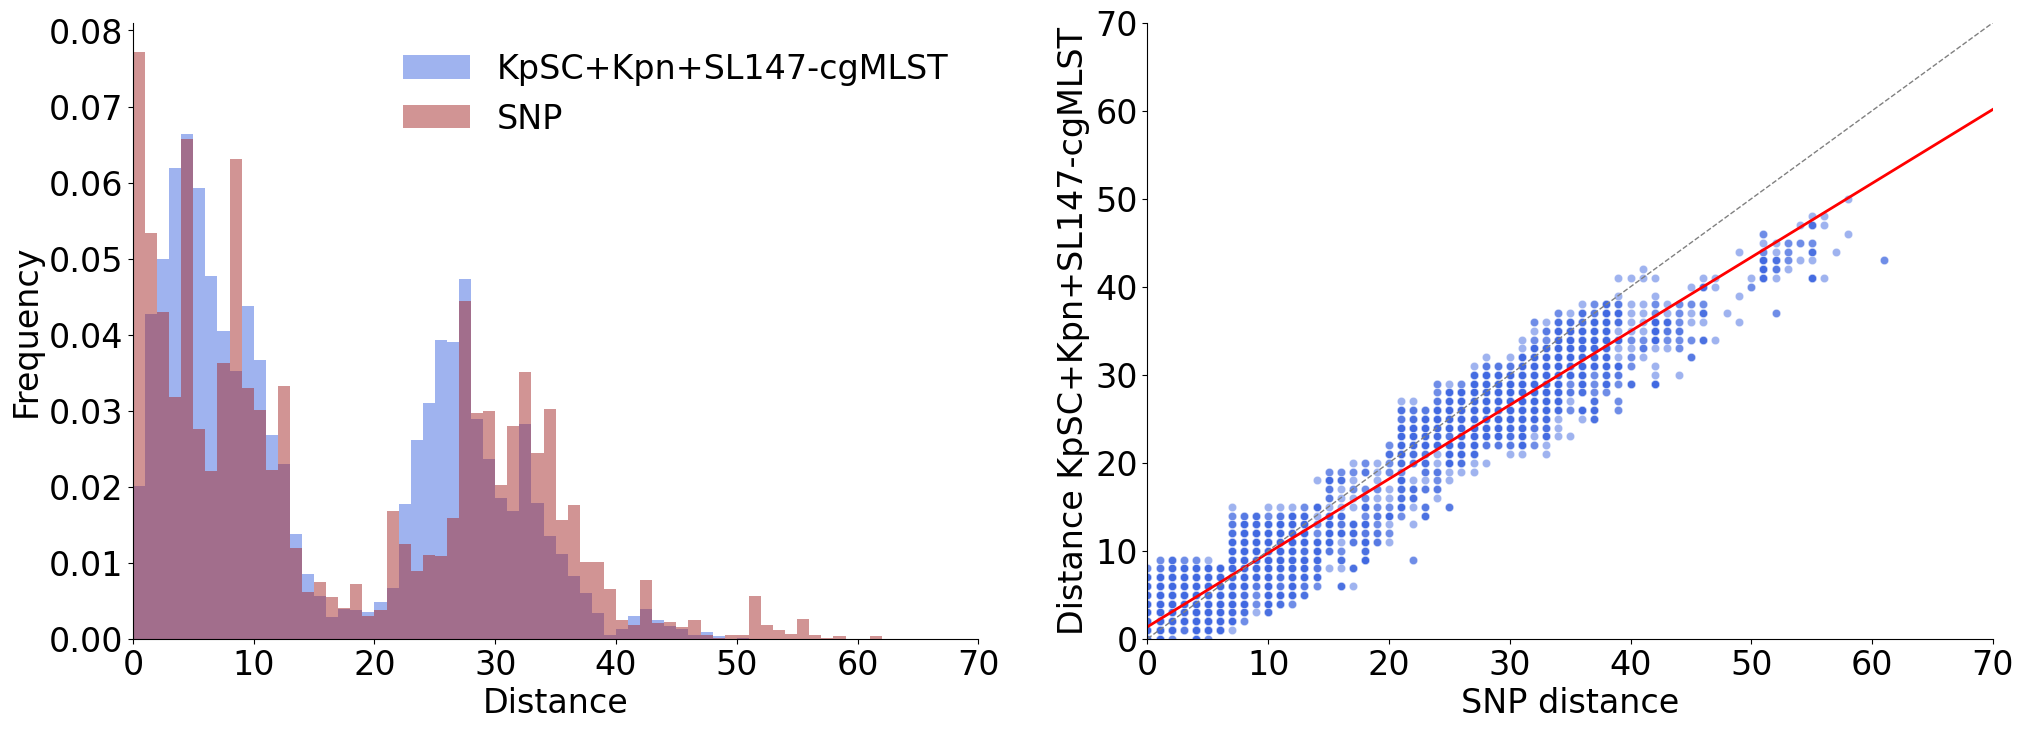

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu
from matplotlib.gridspec import GridSpec
from scipy.stats import linregress, pearsonr
from scipy.stats import t

distance_matrix_all = DM_project77_all_df_subset.to_numpy()
snvs_noGub=project77_SNV_noGub_reindexed.to_numpy()
snvs_withGub=project77_SNV_withGub_reindexed.to_numpy()

# Flatten the matrices, excluding the diagonal
def flatten_matrix(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)]

# distances1 = flatten_matrix(distance_matrix_only_kpsc)
# distances2 = flatten_matrix(distance_matrix_with_kpn)
distances3 = flatten_matrix(distance_matrix_all)
distances4 = flatten_matrix(snvs_noGub)
distances5 = flatten_matrix(snvs_withGub)

# Prepare combined figure with specified layout
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 2, width_ratios=[1, 1], wspace=0.2)

# First row, first subplot: Histograms
ax1 = fig.add_subplot(gs[0, 0])
common_range = (min(distances3.min(), distances5.min()), 70)
ax1.hist(distances3, bins=70, alpha=0.5, label='KpSC+Kpn+SL147-cgMLST', color='royalblue', density=True, range=common_range)
ax1.hist(distances5, bins=70, alpha=0.5, label='SNP', color='brown', density=True, range=common_range)
# ax1.hist(distances1, bins=100, alpha=0.5, label='KpSC', color='royalblue', density=True, range=common_range)
# ax1.hist(distances2, bins=100, alpha=0.5, label='Kpn', color='brown', density=True, range=common_range)


ax1.set_xlabel('Distance', fontsize=24)
ax1.set_ylabel('Frequency', fontsize=24)
ax1.set_xlim(0, 70)
ax1.tick_params(axis='both', which='major', labelsize=24)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Create legend without borders
ax1.legend(loc='upper right', frameon=False, fontsize=24)

# fourth row, full-width subplot: Scatter plot
ax4 = fig.add_subplot(gs[0, 1])

# Calculate linear regression
slope, intercept, _, _, _ = linregress(distances5,distances3)

# Calculate linear regression (already done, but fetch slope_stderr too)
slope, intercept, r_value, p_value, slope_stderr = linregress(distances5, distances3)

# Degrees of freedom
n = len(distances5)
df = n - 2

# t-statistic for test that slope == 1
t_stat = (slope - 1) / slope_stderr

# Two-sided p-value for t-test
p_slope1 = 2 * t.sf(np.abs(t_stat), df)

print(f"Slope: {slope:.4f}")
print(f"Slope standard error: {slope_stderr:.4f}")
print(f"t-statistic (slope=1): {t_stat:.4f}")
print(f"p-value (slope=1): {p_slope1:.4g}")

# Calculate the Pearson correlation coefficient
pearson_r, _ = pearsonr(distances5, distances3)

# Scatter plot of the data
ax4.scatter(
    distances5, 
    distances3, 
    alpha=0.5, 
    color='royalblue', 
    edgecolors='w', 
    linewidth=0.5
)

# Plot the linear regression line
x_values = np.array([0, 70])
ax4.plot(
    x_values, 
    slope * x_values + intercept, 
    color='red', 
    linewidth=2, 
    label='_nolegend_'
)

# Set axes labels and limits
ax4.set_xlabel('SNP distance', fontsize=24)
ax4.set_ylabel('Distance KpSC+Kpn+SL147-cgMLST', fontsize=24)
ax4.set_ylim(0, 70)
ax4.set_xlim(0, 70)
ax4.tick_params(axis='both', which='major', labelsize=24)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# Plot the y=x line (diagonal line for reference)
x_min, x_max = ax4.get_xlim()
ax4.plot(
    [x_min, x_max], 
    [x_min, x_max], 
    linestyle='--', 
    color='gray', 
    linewidth=1
)

plt.tight_layout()
plt.savefig("./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/plots/combined_subplots_histogram_project77_withGubbins.png", dpi=600)
plt.show()